# PROJECT STARTS HERE

# Importing Libraries and Modules

In [1]:
import sklearn
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
# import time
# import mediapipe as mp
# import csv
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
# !pip3 install --upgrade numpy==1.18.0

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [26]:
tf.__version__

'2.6.0'

In [27]:
# import numpy as np
np.__version__

'1.23.5'

In [28]:
!python --version

Python 3.9.18


In [29]:
!pip3 install numpy

# Frame Extraction

In [30]:
# Folder path of dataset
folder_path = r'D:\FYP_HWU\Videos'
DATA_PATH = r'D:\FYP_HWU'

In [32]:
# List of actions to train model with (10 classes or actions)
actions = [
'accident',
'call',
'help',
'man',
'murder',
'woman',
'danger',
'police',
'bed',
'drink'
]


### Counting number of videos under each action in the dataset

In [47]:
# Initializing the path of the dataset
# folder_path = r'C:\Users\revan\Documents\FYP_HWU\New_FYP\NEW_MP_Frames'
folder_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'

#### Getting a count of videos per action mentioned in the actions list

In [3]:
# Initializing variables
video_count = {}
# folder_path = r'D:\FYP_HWU\NEW_Frames'

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    # print(os.path.join(folder_path, i))
    for i in dirs: #loop through each of the keywords or actions in the dataset
        # if (i in actions): #if the keyword is present in the shortlisted list of actions
        for root, dirs, files in os.walk(os.path.join(folder_path, i)):
            video_count[i] = len(files) #get the number of videos per class and append to the dictionary
            break
    break

print(video_count)

{'before': 16, 'computer': 14, 'cool': 16, 'cousin': 17, 'drink': 15, 'go': 15, 'help': 14, 'inform': 14, 'take': 14, 'thin': 16, 'who': 14}


#### Getting the classes with highest number of videos

In [51]:
# Initializing variables
video_count = {}
first_11_items = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        for root, dirs, files in os.walk(os.path.join(folder_path, i)):
            video_count[i] = len(files)
            break

    break


In [70]:
# Initializing variables
video_count = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        files1 = []
        if(i in list(first_11_items.keys())):
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                for d in dirs:
                    files1.append(os.path.join(folder_path, i, d))
                break
            video_count[i] = files1
    break

In [72]:
first_11_items

{'cousin': 17,
 'before': 16,
 'cool': 16,
 'thin': 16,
 'drink': 15,
 'go': 15,
 'computer': 14,
 'help': 14,
 'inform': 14,
 'take': 14,
 'who': 14,
 'accident': 13,
 'bed': 13,
 'bowling': 13,
 'candy': 13,
 'give': 13,
 'murder': 13,
 'short': 13,
 'tall': 13,
 'thanksgiving': 13}

In [52]:
video_count1 = sorted(video_count.items(), key=lambda x:x[1], reverse = True)  #sorting the dictionary based on the number of videos and reversing it to arrange in s=descending order

In [53]:
# getting the top 11 classes
for idx, k in enumerate(video_count1):
    if idx == 20: break
    first_11_items[k[0]] = k[1]

print(first_11_items)

{'cousin': 17, 'before': 16, 'cool': 16, 'thin': 16, 'drink': 15, 'go': 15, 'computer': 14, 'help': 14, 'inform': 14, 'take': 14, 'who': 14, 'accident': 13, 'bed': 13, 'bowling': 13, 'candy': 13, 'give': 13, 'murder': 13, 'short': 13, 'tall': 13, 'thanksgiving': 13}


In [57]:
summ=0
for i in first_11_items.keys():
    summ=summ + first_11_items[i]

print(summ)

282


### Getting the video paths of the videos

In [3]:
folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Videos2'
video_paths = {} #declaring an empty dictionary to store the file paths

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for action in dirs:  #iterating through each action in the actions list
        temp=[]
        for root, dirs, files in os.walk(os.path.join(folder_path, action)):  # accessing files and folders under each class
            for file in files:    # iterating through videos in the class folder
                temp.append(os.path.join(folder_path, action, file)) #storing video paths in the dictionary
            video_paths[action] = temp
            break
    break

In [6]:
video_paths

{'before': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05727.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05728.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05729.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05730.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05731.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05732.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05733.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05734.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05739.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05740.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05741.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05742.mp4',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Videos2\\before\\05743.mp4',
  

In [38]:
# storing the file paths (video paths) in a csv file
df = pd.DataFrame.from_dict(video_paths, orient='index')
df = df.transpose()
df.to_csv('video_paths.csv', index=False)

In [39]:
# Reading the csv file to get the video paths and storing them in a dictionary
def read_csv_to_dict(csv_file):
    result_dict = {}

    with open(csv_file, 'r') as file:
        csv_reader = csv.reader(file)

        # Read the header row to get the keys
        keys = next(csv_reader, None)
        if keys:
            for key in keys:
                result_dict[key] = []

            # Read the rest of the rows and store values in the dictionary
            for row in csv_reader:
                for i in range(len(keys)):
                    result_dict[keys[i]].append(row[i])

    return result_dict

In [21]:
video_paths = read_csv_to_dict("video_paths.csv")

### Creating folders to store frames

In [7]:
#Creating folder 'NEW_Frames' that will contain all the video frames
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\NEW_Frames'
# os.makedirs(os.path.join(DATA_PATH,'NEW_Frames'))

In [8]:
#Creating one folder for each action
for action in video_paths.keys():
    # 1 folder for each video of the action
    for sequence in range(len(video_paths[action])):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## Extracting frames from videos and adding them to folders

2 Approaches have be defined for frame extraction. 
The second approach has be used for this implementation.

### APPROACH 1
Here, a fixed number of frames are extracted from each video (60 in this case). If the extracted frames from a video are less than 60, then the last frame is repeated to reach the 60 count. If the video is too long, then then the first 60 frames of the video will be extracted.

In [ ]:
#looping through each action
for action in video_paths.keys():

    #Looping through each video of the action
    for sequence in range(len(video_paths[action])):

        # Open the video file
        cap = cv2.VideoCapture(video_paths[action][sequence])

        # Initializing variables
        frame_count = 0       # current frame count
        max_fc = 60          # maximum frame count


        #while the video is accessible and the current frame count doesn't exceed the max frame count limit
        while (cap.isOpened() and frame_count < max_fc):
            #reading the video frame
            success, frame = cap.read()

            #if there are frames
            if success:
                image = frame.copy()
                cv2.imshow("{} - {}".format(action, sequence), image)

                #saving the extracted frames (in jpg format)
                cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
                frame_count+=1
            else:
                break

        # repeat last frame until we reach max frame count
        while frame_count < max_fc:
            cv2.imwrite(os.path.join(DATA_PATH , action, str(sequence), 'frame'+ str(frame_count) + '.jpg'), image)
            frame_count+=1

        cap.release()
        cv2.destroyAllWindows()

### APPROACH 2
Here too, a fixed number of frames are extracted from each video (20 in this case). The frames will be extracted after dividing the complete video into equal parts and then choosing the frames from each part. This way we will be able to avoid the first few or last frames few of the video if no action is being depicted. Secondly, the basic movement of the action is captured.

In [9]:
# Deciding how many frames to extract?
count = []
for action in video_paths.keys():
        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])
            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            count.append(total_frames)
            cap.release()

In [10]:
print(min(count))

23.0


In [11]:
print(max(count))

155.0


In [12]:
# Defining a path to store the extracted frames
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\NEW_Frames'

In [16]:
# This function determines the frames to be skipped to extract frames from videos of variable lengths.
def frameSkipping(DATA_PATH, video_paths, n):
    for action in video_paths.keys():

        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])

            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  #getting the total frame count
            frames_step = total_frames//n    # getting the number of frames to skip

            for frame_num in range(n):
                #position the pointer to the frame after skipping frames
                cap.set(1,frame_num*frames_step)
                success,image = cap.read()
                #save the image
                cv2.imwrite(os.path.join(DATA_PATH, action, str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

            cap.release()


In [17]:
frameSkipping(DATA_PATH, video_paths, 22)

# Data Preprocessing
By the end of this section, we will folders containing the images frames stored in jpg format for each video of each action.

## Resizing Images

Resizing the images to 224 x 224 pixel size to feed to ResNet50 and Xception pre-trained model.

In [18]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [19]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [22]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [23]:
max_fc = 22
resize = (224,224)
# AUG_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\MP_Frames'
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\NEW_Frames'

videoCount = totalVideoCount(DATA_PATH) #getting a video count from original frame dataset

#looping through each action
for action in videoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(videoCount[action]):

        # #creating a folder in AUG frames folder
        # try:
        #     os.makedirs(os.path.join(AUG_PATH, action, str(sequence)))
        # except:
        #     pass

        # iterating through each frame in the original frame dataset
        for frame_num in range (max_fc):
            IMAGE_PATH = os.path.join(DATA_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

            # Reading the image
            image = cv2.imread(IMAGE_PATH)

            new_image = resizeFrames(image, resize)

            #Saving the image in the folder created
            cv2.imwrite(os.path.join(DATA_PATH, str(action), str(sequence), 'frame' + str(frame_num) + '.jpg'), new_image)

            # Displaying Image
            cv2.destroyAllWindows()


## Data Augmentation
 Using:
 - Frame Mirroring (Flipping the image horizontally)
 - Changing contrast, brightness and saturation levels
 - Rotating

 Here, we take each video, apply the above video augmentation filters and store them in a seperate folder.


In [4]:
def blackAndWhite(image): # takes image as a parameter
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(0)

    # return np.array(new_image)
    return new_image

In [5]:
def saturation(image): # takes image as a parameter
    # Horizontally flipping the image
    image = flipImage(image)
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(1.5)

    # return np.array(new_image)
    return new_image

In [174]:
def flipImage(image): # takes image as a parameter
    # Converting Image to numpy array
    new_image = np.array(image)

    # Horizontally flipping the image
    image = cv2.flip(new_image, 1)

    # Converting numpy aray to image format
    image = Image.fromarray(image.astype('uint8'))

    # Returning the image in image format
    return image

In [173]:
def rotateImage(image):
    image  = image.rotate(-8)  #- or + -> left or right
    return image

In [6]:
actions = ['before','computer', 'cool', 'cousin', 'drink', 'go', 'help', 'take', 'thin', 'who']

In [70]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            if folder in actions:
                for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                    finalVideoCount[folder] = len(dirs)
                    break
    return finalVideoCount

In [72]:
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test'
VideoCount = totalVideoCount(DATA_PATH)
print(VideoCount)

{'before': 2, 'computer': 2, 'cool': 2, 'cousin': 3, 'drink': 3, 'go': 3, 'help': 2, 'take': 2, 'thin': 2, 'who': 2}


In [181]:
max_fc = 22  #maximum number of frames extracted per video
resize = (224,224) #dimensions to resize the image to
AUG_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\AUG_Train' # defining file path to store the video frames after data augmentation
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Train2'

finalVideoCount = totalVideoCount(AUG_PATH)
video_count = totalVideoCount(DATA_PATH)

#looping through each action
for action in video_count.keys():
    actionCount = finalVideoCount[action]

    #Looping through the count for videos for that action
    for sequence in range(video_count[action]):

        #creating a folder to store the augmented images
        folder_number = actionCount + sequence
        if(folder_number < 40):
            try:
                os.makedirs(os.path.join(AUG_PATH, action, str(folder_number)))
            except:
                pass #pass if the folder has already been created

            for frame_num in range (max_fc):
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                #Converting numpy array to Image
                image = Image.fromarray(image.astype('uint8'))

                # Applying the filters
                # new_image = blackAndWhite(image)
                new_image = flipImage(image)
                # new_image = saturation(image)
                # new_image = rotateImage(image)

                # Converting Image to numpy array
                new_image = np.array(new_image)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(AUG_PATH , str(action), str(folder_number), 'frame'+ str(frame_num) + '.jpg'), new_image)

                # Displaying Image
                cv2.destroyAllWindows()

        else:
            break


In [182]:
finalVideoCount = totalVideoCount(AUG_PATH)
print(finalVideoCount)

{'before': 33, 'computer': 30, 'cool': 33, 'cousin': 36, 'drink': 30, 'go': 30, 'help': 30, 'take': 30, 'thin': 33, 'who': 30}


## Keypoint Extraction using MediaPipe Holistics
Applying MediaPipe Keypoint Landmarks to the augmented frames.

In [1]:
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic #Holistic model (use for detections)
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius=1)

In [3]:
#Capturing landmarks
def mediapipeHolistics(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion -> BGR to RGB
    image.flags.writeable = False
    results = model.process(image) # Making Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion -> RGB to BGR
    return image, results

In [5]:
#Visualize landmarks, connecting the landmarks on the image (drawing only pose and had landmarks)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.pose_landmarks,
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.left_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.right_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)

In [11]:
max_fc = 22
AUG_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test2'
FRAMES_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test1'

finalVideoCount = totalVideoCount(AUG_PATH)
os.makedirs(FRAMES_PATH)
#looping through each action
for action in finalVideoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):

        # Creating folders to store frames and extracted landmarks
        try:
            os.makedirs(os.path.join(FRAMES_PATH, action, str(sequence)))
        except:
            pass

        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            for frame_num in range (max_fc):

                # Getting the extracted frame from the folder
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Making detection
                image, result = mediapipeHolistics(image, holistic)

                #Darwing landmarks on frames
                draw_landmarks(image,result)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

                # Displaying Image
                cv2.destroyAllWindows()


# Creating the Dataset

### Creating folders

In [4]:
# Splitting data in 70:15:15 train:validation:test ratio
def trainTestSplit(X,y):
    x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42, stratify=y_temp)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [135]:
# List of actions to train model with (10 classes or actions)
actions = ['before','computer', 'cool', 'cousin', 'drink', 'go', 'help', 'take', 'thin', 'who']


In [136]:
# Initializing variables
video_count = {}
folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\NEW_Frames'
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(folder_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        if i in actions:
            files1 = []
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                for d in dirs:
                    files1.append(os.path.join(folder_path, i, d))
                break
            video_count[i] = files1
    break

In [137]:
X = []
y= []
for i in video_count.keys():
    for j in video_count[i]:
        X.append(j)
        y.append(i)
    

In [141]:
len(X_val)

23

In [140]:
# Splitting the data in 80:10:10 ratio
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X,y)

In [46]:
X_val

['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\before\\3',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\cool\\8',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\thin\\9',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\help\\1',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\go\\8',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\cool\\7',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\thin\\12',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\drink\\11',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\go\\4',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\cousin\\11',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\help\\8',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\who\\0',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\inform\\2',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Frames\\computer\\7',
 'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\MP_Fram

#### Moving the split data in Train, Validation and Test folders

In [7]:
import shutil
import os

##### Creating Train folder

In [147]:
Train = []
for old_path in X_train:
    new_path = old_path.replace("NEW_Frames", "Train")
    Train.append(new_path)

In [165]:
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Train'
ALT_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Train2'
# os.makedirs(ALT_PATH)
for root, dirs, files in os.walk(DATA_PATH):
    for i in dirs: # iterate through each action
        for root, dirs, files in os.walk(os.path.join(DATA_PATH, i)):
            count = len(dirs)
            for j in range(count):
                os.makedirs(os.path.join(ALT_PATH, i, str(j)))

In [25]:
video_count

{'before': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\before\\14',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\before\\6'],
 'computer': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\computer\\1',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\computer\\12'],
 'cool': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\cool\\10',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\cool\\5'],
 'cousin': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\cousin\\1',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\cousin\\16',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\cousin\\4'],
 'drink': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\drink\\1',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\drink\\10',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\drink\\9'],
 'go': ['C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\go\\1',
  'C:\\Users\\revan\\Documents\\FYP_HWU\\DATA\\Test\\go\\6',
  'C:\\Users\\revan\\Documents\\FYP_

In [149]:
for i in Train:
    try:
        os.makedirs(i)
    except:
        pass

In [150]:
# Moving all videos from source dir to dest dir
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for i in range (len(X_train)):
    for root, dirs, files in os.walk(X_train[i]):
        for file in files:
            full_file_name = os.path.join(X_train[i], file) #add file name to the source path
            shutil.copy(full_file_name, os.path.join(Train[i], file))   # copy file to dest path  
        break

##### Creating Validation folder

In [151]:
Val = []
for old_path in X_val:
    new_path = old_path.replace("NEW_Frames", "Validation")
    Val.append(new_path)

In [166]:
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Validation'
ALT_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Val2'
# os.makedirs(ALT_PATH)
for root, dirs, files in os.walk(DATA_PATH):
    for i in dirs: # iterate through each action
        for root, dirs, files in os.walk(os.path.join(DATA_PATH, i)):
            count = len(dirs)
            for j in range(count):
                os.makedirs(os.path.join(ALT_PATH, i, str(j)))

In [153]:
for i in Val:
    try:
        os.makedirs(i)
    except:
        pass

In [154]:
# Moving all videos from source dir to dest dir
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for i in range (len(X_val)):
    for root, dirs, files in os.walk(X_val[i]):
        for file in files:
            full_file_name = os.path.join(X_val[i], file) #add file name to the source path
            shutil.copy(full_file_name, os.path.join(Val[i], file))   # copy file to dest path  
        break

##### Creating Test folder

In [155]:
Test = []
for old_path in X_test:
    new_path = old_path.replace("NEW_Frames", "Test")
    Test.append(new_path)

In [167]:
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test'
ALT_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test2'
# os.makedirs(ALT_PATH)
for root, dirs, files in os.walk(DATA_PATH):
    for i in dirs: # iterate through each action
        for root, dirs, files in os.walk(os.path.join(DATA_PATH, i)):
            count = len(dirs)
            for j in range(count):
                os.makedirs(os.path.join(ALT_PATH, i, str(j)))

In [157]:
for i in Test:
    try:
        os.makedirs(i)
    except:
        pass

In [158]:
# Moving all videos from source dir to dest dir
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for i in range (len(X_test)):
    for root, dirs, files in os.walk(X_test[i]):
        for file in files:
            full_file_name = os.path.join(X_test[i], file) #add file name to the source path
            shutil.copy(full_file_name, os.path.join(Test[i], file))   # copy file to dest path  
        break

##### Renumbering folders and moving files

In [160]:
def getFilePath(folder_path):
    video_count = {}
    # Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
    for root, dirs, files in os.walk(folder_path):
        for i in dirs: #loop through each of the keywords or actions in the dataset
            files1 = []
            for root, dirs, files in os.walk(os.path.join(folder_path, i)):
                for d in dirs:
                    files1.append(os.path.join(folder_path, i, d))
                break
            video_count[i] = files1
        break

    return video_count

In [162]:
# move files to the correctly numbered folders
def moveFiles(dest_folder_path, video_count):
    for i in video_count.keys():
        for j in range(len(video_count[i])):
            for root, dirs, files in os.walk(video_count[i][j]):
                for file in files:
                    full_file_name = os.path.join(video_count[i][j], file) #add file name to the source path
                    shutil.copy(full_file_name, os.path.join(dest_folder_path, i, str(j), file))   # copy file to dest path  
                break


In [168]:
folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Train'
dest_folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Train2'
video_count = getFilePath(folder_path)
moveFiles(dest_folder_path, video_count)

In [169]:
folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Validation'
dest_folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Val2'
video_count = getFilePath(folder_path)
moveFiles(dest_folder_path, video_count)

In [171]:
folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test'
dest_folder_path = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test2'
video_count = getFilePath(folder_path)
moveFiles(dest_folder_path, video_count)

## Visualizing dataset frames

In [ ]:
from PIL import Image, ImageEnhance
from IPython.display import Image
DATA_PATH = r'D:\FYP_HWU\NEW_MP_Frames'

ACTION: Man    Video: 0     Frame: 22


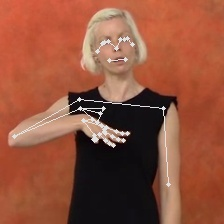

In [ ]:
# man (video 0, frame 22)
print("ACTION: Man    Video: 0     Frame: 22")
display(Image(filename="{}/man/0/frame15.jpg". format(DATA_PATH)))

## Creating Labels and Features

In [3]:
# Initializing data path
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\DATA\AUG_Train'
DATA_VAL = r'C:\Users\revan\Documents\FYP_HWU\DATA\Val1'
DATA_TEST = r'C:\Users\revan\Documents\FYP_HWU\DATA\Test1'

In [4]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    actions = ['before','computer', 'cool', 'cousin', 'drink', 'go', 'help', 'take', 'thin', 'who']
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            if folder in actions:
                for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                    finalVideoCount[folder] = len(dirs)
                    break
    return finalVideoCount

In [5]:
total_video_count = totalVideoCount(DATA_PATH)
label_map = {label:num for num, label in enumerate(total_video_count.keys())} 

In [8]:
# Converting frames from BGR to RGB format and normalizing pixel values
def frameEnhance(frame):
    # Converting BGR -> RGB
    frame = frame[:, :, [2, 1, 0]]
    # Normalize the pixel values
    frame = frame / 255.0
    return frame

In [9]:
# FOR SOLO MODELS
# Adding videos to list (grouping the 22 frames in a list) 
def readingFrames(DATA_PATH, total_video_count):
    max_fc = 22
    videoFrames=[]
    videolabels=[]

    # Iterating through each action
    for action in total_video_count.keys():

        # Iterting through each video in the action
        for sequence in range(total_video_count[action]):

            # Declaring a list to store the frames of each video
            frames = []

            # Iterating through each frame
            for frame_num in range(max_fc):

                # Loading the image frame
                frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
                frame = frameEnhance(frame)

                # Appending to the list
                frames.append(frame)

            # Adding to the dataset
            videoFrames.append(frames)
            videolabels.append(label_map[action])

        print("Action {} done".format(action))
    cv2.destroyAllWindows()

    return videoFrames, videolabels

In [144]:
# FOR HYBRID MODELS
def readingFramesHYBRID(DATA_PATH, total_video_count):
    max_fc = 22
    videoFrames=[]
    videolabels=[]

    # Iterating through each action
    for action in total_video_count.keys():

        # Iterting through each video in the action
        for sequence in range(total_video_count[action]):

            # Iterating through each frame
            for frame_num in range(max_fc):

                # Loading the image frame
                frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
                frame = frameEnhance(frame)

                # Appending to the list
                videoFrames.append(frame)

            # Adding to the dataset
            videolabels.append(label_map[action])

        print("Action {} done".format(action))
    cv2.destroyAllWindows()
    return videoFrames, videolabels

In [10]:
X, y = readingFrames(DATA_PATH, totalVideoCount(DATA_PATH))
X_train = np.array(X)
y_train = to_categorical(y).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [11]:
X_val, y_val = readingFrames(DATA_VAL, totalVideoCount(DATA_VAL))
X_val = np.array(X_val)
y_val = to_categorical(y_val).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [12]:
X_test, y_test = readingFrames(DATA_TEST, totalVideoCount(DATA_TEST))
X_test = np.array(X_test)
y_test = to_categorical(y_test).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [148]:
X, y = readingFramesHYBRID(DATA_PATH, totalVideoCount(DATA_PATH))
X_train = np.array(X)
y_train = to_categorical(y).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [149]:
X_val, y_val = readingFramesHYBRID(DATA_VAL, totalVideoCount(DATA_VAL))
X_val = np.array(X_val)
y_val = to_categorical(y_val).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [150]:
X_test, y_test = readingFramesHYBRID(DATA_TEST, totalVideoCount(DATA_TEST))
X_test = np.array(X_test)
y_test = to_categorical(y_test).astype(int)

Action before done
Action computer done
Action cool done
Action cousin done
Action drink done
Action go done
Action help done
Action take done
Action thin done
Action who done


In [151]:
X_train.shape

(6930, 224, 224, 3)

#### ----

In [ ]:
# !pip3 install --upgrade tensorflow

^C


In [ ]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

In [ ]:
# # Splitting data in 80:10:10 train:validation:test ratio
# def trainTestSplit(X,y):
#     x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.2, random_state=42)
#     x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)
#     return x_train, y_train, x_val, y_val, x_test, y_test

In [99]:
# Initializing data path
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\New_FYP\AUG_Train'
DATA_VAL = r'C:\Users\revan\Documents\FYP_HWU\New_FYP\Validation'
DATA_TEST = r'C:\Users\revan\Documents\FYP_HWU\New_FYP\Validation'

In [100]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for folder in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, folder)):
                finalVideoCount[folder] = len(dirs)
                break
    return finalVideoCount

In [102]:
# Getting the final number of videos under each Action
total_video_count = totalVideoCount(DATA_PATH)
# temp_list = ['police', 'follow', 'child', 'woman', 'man', 'help', 'call', 'danger', 'murder', 'accident']
# subset_video_count = {}
# for temp in temp_list:
#     subset_video_count[temp] = total_video_count[temp]

print(total_video_count)

{'accident': 40, 'bed': 40, 'call': 40, 'danger': 40, 'drink': 40, 'help': 40, 'man': 40, 'murder': 40, 'police': 40, 'woman': 40}


In [103]:
# Setting numeric labels for non numeric action category values
label_map = {label:num for num, label in enumerate(total_video_count.keys())} #subset of classes

In [104]:
print(label_map)

{'accident': 0, 'bed': 1, 'call': 2, 'danger': 3, 'drink': 4, 'help': 5, 'man': 6, 'murder': 7, 'police': 8, 'woman': 9}


### Frame Enhancement

In [105]:
# Converting frames from BGR to RGB format and normalizing pixel values
def frameEnhance(frame):
    # Converting BGR -> RGB
    frame = frame[:, :, [2, 1, 0]]
    # Normalize the pixel values
    frame = frame / 255.0
    return frame

#### For ALL classes

In [ ]:
# Adding videos to list (grouping the 20 frames in a list) 
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in total_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            frames.append(frame)

        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action accident done
Action call done
Action child done
Action danger done
Action follow done
Action help done
Action man done
Action murder done
Action police done
Action sick done
Action woman done


In [106]:
# Adding individual frames to list for feature extraction
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in total_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            videoFrames.append(frame)

        # Adding to the dataset
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action accident done
Action bed done
Action call done
Action danger done
Action drink done
Action help done
Action man done
Action murder done
Action police done
Action woman done


In [ ]:
# print(total_video_count)
print(DATA_PATH)

C:\Users\revan\Documents\FYP_HWU\NEW_MP_Frames


#### For subset (10 classes)

In [ ]:
# Adding videos to list (grouping the 20 frames in a list) 
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in subset_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(subset_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            frames.append(frame)

        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action police done
Action follow done
Action child done
Action woman done
Action man done
Action help done
Action call done
Action danger done
Action murder done
Action accident done


In [ ]:
# # Adding individual frames to list for feature extraction
# max_fc = 20
# videoFrames=[]
# videolabels=[]

# # Iterating through each action
# for action in subset_video_count.keys():

#     # Iterting through each video in the action
#     for sequence in range(subset_video_count[action]):

#         # Iterating through each frame
#         for frame_num in range(max_fc):

#             # Loading the image frame
#             frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
#             frame = frameEnhance(frame)

#             # Appending to the list
#             videoFrames.append(frame)

#         # Adding to the dataset
#         videolabels.append(label_map[action])

#     print("Action {} done".format(action))
# cv2.destroyAllWindows()

Action police done
Action follow done
Action child done
Action woman done
Action man done
Action help done
Action call done
Action danger done
Action murder done
Action accident done


In [111]:
X = np.array(videoFrames)

In [ ]:
X.shape

(450, 20, 224, 224, 3)

In [112]:
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1]
y_labels = to_categorical(videolabels).astype(int)

In [113]:
y_labels.shape 

(400, 10)

# Model Training and Evaluation

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, LSTM, Bidirectional, Input, BatchNormalization, GlobalAveragePooling2D, Activation, GlobalMaxPool2D, Concatenate, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from keras.callbacks import LearningRateScheduler
# from keras.optimizers import Adam, RMSprop, SVM
from tensorflow.keras.optimizers import Adam, RMSprop

## Defining Model Architectures

In [15]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [16]:
# defining path to store model weights
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'

In [18]:
# defining a function to save the weights of best model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Res50_10C_1.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
batch_size = 2
epochs = 10

In [ ]:
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train1, np.float32)
   y = tf.convert_to_tensor(y_train1, np.float32)

### ResNet50 Model

In [ ]:
# # from tensorflow.keras.models import load_model
# log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs'
# folder_path = os.path.join(log_dir,"ckpt.Xcep_Bi_10C_3.keras")
# res50LoadModel=load_model(folder_path)

In [ ]:
res50LoadModel.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 20, 2048)]        0         
_________________________________________________________________
bidirectional_16 (Bidirectio (None, 20, 64)            532736    
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 32)                10368     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0   

In [19]:
import tensorflow as tf

In [20]:
# Load pre-trained ResNet50 without the top (fully connected) layers
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_model.layers:
    layer.trainable = False

# Input layer for the video frames
input_frames = Input(shape=(22, 224, 224, 3))

# Apply TimeDistributed to the ResNet50 base
resnet_output = TimeDistributed(resnet_model)(input_frames)

# Global Average Pooling layer to reduce spatial dimensions
global_avg_pool = TimeDistributed(GlobalAveragePooling2D())(resnet_output)

# Fully connected layers for video-level classification
dense_layer = (Flatten())(global_avg_pool)
# dense_layer = Dropout(0.2)(dense_layer)
# dense_layer = Dense(64, activation='relu')(dense_layer)
# dense_layer = Dense(128, activation='relu')(dense_layer)
# dense_layer = Dense(64, activation='relu')(dense_layer)
output_layer = Dense(10, activation='softmax')(dense_layer)  # Assuming 4 classes, adjust as needed

# Create the final model
hybrid_model2 = tf.keras.models.Model(inputs=input_frames, outputs=output_layer)


In [105]:
hybrid_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 22, 224, 224, 3)] 0         
_________________________________________________________________
time_distributed (TimeDistri (None, 22, 7, 7, 2048)    23587712  
_________________________________________________________________
time_distributed_1 (TimeDist (None, 22, 2048)          0         
_________________________________________________________________
flatten (Flatten)            (None, 45056)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                450570    
Total params: 24,038,282
Trainable params: 450,570
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y_labels)

In [21]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)
   # x_val = tf.convert_to_tensor(X_val, np.float32)
   # y_val = tf.convert_to_tensor(y_val, np.float32)

In [69]:
X_test.shape

(23, 22, 224, 224, 3)

In [50]:
# defining a function to save the weights of best model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Res50_10C_3.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

In [23]:
history = hybrid_model2.fit(x, y, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks=[checkpoint, earlyStopping])

Epoch 1/100
20/20 [==============================] - 54s 1s/step - loss: 2.4975 - accuracy: 0.0921 - val_loss: 2.3108 - val_accuracy: 0.1304


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/100
20/20 [==============================] - 20s 984ms/step - loss: 2.3277 - accuracy: 0.1206 - val_loss: 2.3565 - val_accuracy: 0.0870
Epoch 3/100
20/20 [==============================] - 20s 990ms/step - loss: 2.2728 - accuracy: 0.1429 - val_loss: 2.1976 - val_accuracy: 0.1739
Epoch 4/100
20/20 [==============================] - 20s 987ms/step - loss: 2.2266 - accuracy: 0.1651 - val_loss: 2.2219 - val_accuracy: 0.1304
Epoch 5/100
20/20 [==============================] - 20s 989ms/step - loss: 2.2324 - accuracy: 0.1587 - val_loss: 2.2633 - val_accuracy: 0.2174
Epoch 6/100
20/20 [==============================] - 20s 989ms/step - loss: 2.2365 - accuracy: 0.1365 - val_loss: 2.1904 - val_accuracy: 0.1304
Epoch 7/100
20/20 [==============================] - 20s 986ms/step - loss: 2.1435 - accuracy: 0.2127 - val_loss: 2.1534 - val_accuracy: 0.1304
Epoch 8/100
20/20 [==============================] - 20s 991ms/step - loss: 2.1486 - accuracy: 0.2540 - val_loss: 2.1770 - val_accuracy:

### ResNet50 + BiLSTM Model

#### ResNet to train on Frames (to be passed to BiLSTM)

Steps:
1) the dataset that we have currently has each record as frames of a video.
2) each record (only of X datasets, not y) is passed through the ResNet 50  model, and the features are extracted (2048 columns) and stored in a list.
3) this list is then converted into dataframe and stored as a csv file
4) the csv file is then read, and every 20 frame records are clumped to form a video.
5) so, the final dataset is of the shape (361, 22, 2048).
6) these datasets are feeded to the BiLSTM model.

In [118]:
def fe_PretrainedM(df, pretrained_model):
    fe_video = []
    count = 1
    for frame in df:
            features = extract_features(frame, pretrained_model)
            fe_video.append(features) 
            print(count)
            count+=1
            
    # return fe_video, new_y
    return fe_video


In [119]:
def extract_features(frame, model):
    img = np.expand_dims(frame, axis=0)  # Add batch dimension
    features = model.predict(img, verbose = 1)  # Extract features
    return features.flatten()  # Flatten the features

In [122]:
fe_video_train = fe_PretrainedM(X_train, hybrid_model)
features_train = pd.DataFrame(fe_video_train)
# features_y = pd.DataFrame(y)

1/1 [==============================] - 2s 2s/step
1
1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 20ms/step
4
1/1 [==============================] - 0s 16ms/step
5
1/1 [==============================] - 0s 20ms/step
6
1/1 [==============================] - 0s 18ms/step
7
1/1 [==============================] - 0s 24ms/step
8
1/1 [==============================] - 0s 18ms/step
9
1/1 [==============================] - 0s 25ms/step
10
1/1 [==============================] - 0s 22ms/step
11
1/1 [==============================] - 0s 15ms/step
12
1/1 [==============================] - 0s 25ms/step
13
1/1 [==============================] - 0s 27ms/step
14
1/1 [==============================] - 0s 20ms/step
15
1/1 [==============================] - 0s 22ms/step
16
1/1 [==============================] - 0s 16ms/step
17
1/1 [==============================] - 0s 17ms/step
18
1/1 [================

In [123]:
fe_video_val = fe_PretrainedM(X_val, hybrid_model)
features_val = pd.DataFrame(fe_video_val)

1/1 [==============================] - 0s 25ms/step
1
1/1 [==============================] - 0s 16ms/step
2
1/1 [==============================] - 0s 14ms/step
3
1/1 [==============================] - 0s 17ms/step
4
1/1 [==============================] - 0s 24ms/step
5
1/1 [==============================] - 0s 17ms/step
6
1/1 [==============================] - 0s 30ms/step
7
1/1 [==============================] - 0s 25ms/step
8
1/1 [==============================] - 0s 22ms/step
9
1/1 [==============================] - 0s 28ms/step
10
1/1 [==============================] - 0s 24ms/step
11
1/1 [==============================] - 0s 29ms/step
12
1/1 [==============================] - 0s 24ms/step
13
1/1 [==============================] - 0s 25ms/step
14
1/1 [==============================] - 0s 23ms/step
15
1/1 [==============================] - 0s 20ms/step
16
1/1 [==============================] - 0s 16ms/step
17
1/1 [==============================] - 0s 16ms/step
18
1/1 [==============

In [124]:
fe_video_test = fe_PretrainedM(X_test, hybrid_model)
features_test = pd.DataFrame(fe_video_test)

1/1 [==============================] - 0s 33ms/step
1
1/1 [==============================] - 0s 23ms/step
2
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 17ms/step
4
1/1 [==============================] - 0s 16ms/step
5
1/1 [==============================] - 0s 27ms/step
6
1/1 [==============================] - 0s 23ms/step
7
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 23ms/step
9
1/1 [==============================] - 0s 17ms/step
10
1/1 [==============================] - 0s 28ms/step
11
1/1 [==============================] - 0s 21ms/step
12
1/1 [==============================] - 0s 20ms/step
13
1/1 [==============================] - 0s 19ms/step
14
1/1 [==============================] - 0s 20ms/step
15
1/1 [==============================] - 0s 18ms/step
16
1/1 [==============================] - 0s 18ms/step
17
1/1 [==============================] - 0s 19ms/step
18
1/1 [==============

In [279]:
# defining paths to save the CSV file
fe_csv_train = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\RN50_10C_features_Train.csv'
fe_csv_val = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\RN50_10C_features_Val.csv'
fe_csv_test = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\RN50_10C_features_Test.csv'

lb_csv_train = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\train_10C_labels.csv'
lb_csv_val = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\val_10C_labels.csv'
lb_csv_test = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\test_10C_labels.csv'


In [280]:
# Save the DataFrame to a CSV file
labels_df_train = pd.DataFrame(y_train)
labels_df_val = pd.DataFrame(y_val)
labels_df_test = pd.DataFrame(y_test)

# Save the DataFrame to a CSV file
features_train.to_csv(fe_csv_train, index=False)
features_val.to_csv(fe_csv_val, index=False)
features_test.to_csv(fe_csv_test, index=False)

labels_df_train.to_csv(lb_csv_train, index=False)
labels_df_val.to_csv(lb_csv_val, index=False)
labels_df_test.to_csv(lb_csv_test, index=False)

In [281]:
# Reading the csv files
X_train = pd.read_csv(fe_csv_train)
X_train1 = X_train.to_numpy()

X_val = pd.read_csv(fe_csv_val)
X_val1 = X_val.to_numpy()

X_test = pd.read_csv(fe_csv_test)
X_test1 = X_test.to_numpy()

y_train = pd.read_csv(lb_csv_train)
y_train1 = y_train.to_numpy()

y_val = pd.read_csv(lb_csv_val)
y_val1 = y_val.to_numpy()

y_test = pd.read_csv(lb_csv_test)
y_test1 = y_test.to_numpy()

In [282]:
X_train1.shape

(6930, 2048)

In [283]:
def frames_to_video(X_arr):
    fr_count = 0
    X_df = []
    video = []
    max_frames = X_arr.shape[0]

    while(fr_count<max_frames):
        for i in range(22):
            video.append(X_arr[fr_count])
            fr_count+=1
        X_df.append(video)
        video = []

    return X_df


In [284]:
X_train1 = frames_to_video(X_train1)
X_train = np.array(X_train1)

In [285]:
X_val1 = frames_to_video(X_val1)
X_val = np.array(X_val1)

In [290]:
X_test = frames_to_video(X_test)
X_test = np.array(X_test)

In [291]:
X_test.shape

(23, 22, 2048)

In [ ]:
# Splitting into Train, Validation and Test
# X_train, y_train, X_val, y_val = trainTestSplit(X, y)
# X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = trainTestSplit(X_total1, y_labels)

In [121]:
# X_train1.shape

In [120]:
# RESNET Model (for feature extraction)
# Load pre-trained ResNet50 without the top (fully connected) layers
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling="avg")

# Freeze the ResNet50 layers
for layer in resnet_model.layers:
    layer.trainable = False

# Create the final model
hybrid_model = tf.keras.models.Model(inputs=resnet_model.input, outputs=resnet_model.output)



In [ ]:
hybrid_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# !nvidia-smi

In [ ]:
# Define a learning rate schedule function
from keras.callbacks import LearningRateScheduler
def lr_schedule(epoch, current_lr):
    if epoch < 3:
        return current_lr  # Keep the initial learning rate for the first 5 epochs
    else:
        # Increase the learning rate by 3 times after the 5th epoch
        return current_lr * 0.1
    

# Create a learning rate scheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

#### BiLSTMs (Alone)

In [ ]:
from tensorflow.keras.regularizers import l2

In [75]:
from keras.regularizers import l2
from keras.layers import Dropout

input_frames = Input(shape=(22, 2048))

# Bidirectional LSTM layer
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
bilstm_output = Bidirectional(LSTM(128, return_sequences=True))(bilstm_output)
bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# Fully connected layers for video-level classification
dense_layer = Dense(64, activation='relu')(bilstm_output)
# dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
dense_layer = Dense(64, activation='relu')(dense_layer)
dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dense_layer)  # Adding L2 regularization
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dense_layer)  # Adding L2 regularization
output_layer = Dense(10, activation='softmax')(dense_layer)  # Assuming 4 classes, adjust as needed

# Create the final model
hybrid_model = Model(inputs=input_frames, outputs=output_layer)


In [76]:
hybrid_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 22, 2048)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, 22, 128)           1081856   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 22, 256)           263168    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                73984     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0   

In [ ]:
# ALTERNATIVE 1

# input_frames = Input(shape=(20, 2048))

# bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
# # bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
# bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# dense_layer = Dense(32, activation='relu')(bilstm_output)
# # dense_layer = BatchNormalization()(dense_layer)
# dense_layer = Dropout(0.5)(dense_layer)
# dense_layer = Dense(16, activation='relu')(dense_layer)
# dense_layer = Dropout(0.5)(dense_layer)

# output_layer = Dense(10, activation='softmax')(dense_layer)

# hybrid_model2_2 = Model(inputs=input_frames, outputs=output_layer)

In [ ]:
# ALTERNATIVE 2

# # Define the regularization strength
# l2_reg = 0.001  # You can adjust this value as needed

# input_frames = Input(shape=(20, 2048))

# bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
# bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# # Add L2 regularization to the dense layers
# dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(bilstm_output)
# dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(dense_layer)

# output_layer = Dense(10, activation='softmax')(dense_layer)

# hybrid_model2_1 = Model(inputs=input_frames, outputs=output_layer)

In [349]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hybrid_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 2048)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, 20, 128)           1081856   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20, 256)           263168    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                73984     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160  

In [350]:
# defining a function to save the weights of best model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Res50_Bi_10C_3.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=25, verbose=0, mode='min', restore_best_weights=True)

In [351]:
history2_1 = hybrid_model.fit(x, y, epochs=250, batch_size=16, validation_data=(X_val, y_val), callbacks = [checkpoint, earlyStopping])

Epoch 1/250
20/20 [==============================] - 7s 91ms/step - loss: 2.4049 - accuracy: 0.1270 - val_loss: 2.3968 - val_accuracy: 0.0870
Epoch 2/250
20/20 [==============================] - 0s 21ms/step - loss: 2.3835 - accuracy: 0.1587 - val_loss: 2.3816 - val_accuracy: 0.1739
Epoch 3/250
20/20 [==============================] - 0s 22ms/step - loss: 2.3673 - accuracy: 0.1556 - val_loss: 2.3614 - val_accuracy: 0.1304
Epoch 4/250
20/20 [==============================] - 0s 21ms/step - loss: 2.3447 - accuracy: 0.1778 - val_loss: 2.3218 - val_accuracy: 0.2174
Epoch 5/250
20/20 [==============================] - 0s 22ms/step - loss: 2.2916 - accuracy: 0.2190 - val_loss: 2.2697 - val_accuracy: 0.2609
Epoch 6/250
20/20 [==============================] - 0s 21ms/step - loss: 2.2278 - accuracy: 0.2286 - val_loss: 2.2351 - val_accuracy: 0.3043
Epoch 7/250
20/20 [==============================] - 0s 22ms/step - loss: 2.1564 - accuracy: 0.2381 - val_loss: 2.1744 - val_accuracy: 0.3043
Epoch 

In [346]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)


### Xception Model

In [51]:
Xnet_model=tf.keras.applications.Xception(weights='imagenet',include_top=False, input_shape = (224, 224, 3))

# Freeze the ResNet50 layers
for layer in Xnet_model.layers:
    layer.trainable = False

# Input layer for the video frames
input_frames = Input(shape=(22, 224, 224, 3))

# Apply TimeDistributed to the ResNet50 base
Xnet_output = TimeDistributed(Xnet_model)(input_frames)

# Global Average Pooling layer to reduce spatial dimensions
global_avg_pool = TimeDistributed(GlobalAveragePooling2D())(Xnet_output)

# Fully connected layers for video-level classification
dense_layer = (Flatten())(global_avg_pool)
dense_layer = Dropout(0.5)(dense_layer)
output_layer = Dense(10, activation='softmax')(dense_layer) 

# Create the final model
hybrid_model1 = tf.keras.models.Model(inputs=input_frames, outputs=output_layer)



In [106]:
hybrid_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 22, 224, 224, 3)] 0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 22, 7, 7, 2048)    20861480  
_________________________________________________________________
time_distributed_5 (TimeDist (None, 22, 2048)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 45056)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45056)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                450570    
Total params: 21,312,050
Trainable params: 450,570
Non-trainable params: 20,861,480
_________________________________________

In [ ]:
# X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y_labels)

In [74]:
X_test.shape

(23, 22, 224, 224, 3)

In [194]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [52]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# defining a function to save the weights of best model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Xception_10C_4.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=7, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
loss = [4.6342, 0.5936,  0.2700, 0.1015, 0.0394, 0.0396, 0.0308, 0.0355, 0.0049, 0.0017]
accu = [0.2667, 0.8254, 0.9270, 0.9619, , 0.9937, 0.9937, 0.9905, 0.9937, 1.0000, 1.0000]
val_l = [2.1861, 1.4589, 1.6042, 1.3188, 1.6469, 1.2163, 1.1989, 1.0660, 1.3084, 1.2984]
val_a = [0.4783, 0.7826, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522]

In [53]:
history = hybrid_model1.fit(x, y, epochs=100, batch_size=8, validation_data=(X_val, y_val), callbacks=[checkpoint, earlyStopping])

Epoch 1/100
40/40 [==============================] - 24s 535ms/step - loss: 4.6342 - accuracy: 0.2667 - val_loss: 2.1861 - val_accuracy: 0.4783
Epoch 2/100
40/40 [==============================] - 20s 498ms/step - loss: 0.5936 - accuracy: 0.8254 - val_loss: 1.4589 - val_accuracy: 0.7826
Epoch 3/100
40/40 [==============================] - 20s 498ms/step - loss: 0.2700 - accuracy: 0.9270 - val_loss: 1.6042 - val_accuracy: 0.6522
Epoch 4/100
40/40 [==============================] - 20s 498ms/step - loss: 0.1015 - accuracy: 0.9619 - val_loss: 1.3188 - val_accuracy: 0.6522
Epoch 5/100
40/40 [==============================] - 20s 499ms/step - loss: 0.0394 - accuracy: 0.9937 - val_loss: 1.6469 - val_accuracy: 0.6522
Epoch 6/100
40/40 [==============================] - 20s 500ms/step - loss: 0.0396 - accuracy: 0.9937 - val_loss: 1.2163 - val_accuracy: 0.6957
Epoch 7/100
40/40 [==============================] - 20s 499ms/step - loss: 0.0308 - accuracy: 0.9905 - val_loss: 1.1989 - val_accuracy:

KeyboardInterrupt: 

### Xception + BiLSTM Model

In [152]:
# extracting features from each frame using a pretrained model
def fe_PretrainedM(df, pretrained_model):
    fe_video = []
    count = 1
    for frame in df:
            features = extract_features(frame, pretrained_model)
            fe_video.append(features) 
            print(count)
            count+=1
            
    # return fe_video, new_y
    return fe_video


In [153]:
def extract_features(frame, model):
    img = np.expand_dims(frame, axis=0)  # Add batch dimension
    features = model.predict(img, verbose = 1)  # Extract features
    return features.flatten()  # Flatten the features

In [155]:
fe_video_train = fe_PretrainedM(X_train, hybrid_model3)
features_train = pd.DataFrame(fe_video_train)

1/1 [==============================] - 1s 1s/step
1
1/1 [==============================] - 0s 18ms/step
2
1/1 [==============================] - 0s 17ms/step
3
1/1 [==============================] - 0s 12ms/step
4
1/1 [==============================] - 0s 12ms/step
5
1/1 [==============================] - 0s 30ms/step
6
1/1 [==============================] - 0s 21ms/step
7
1/1 [==============================] - 0s 23ms/step
8
1/1 [==============================] - 0s 18ms/step
9
1/1 [==============================] - 0s 17ms/step
10
1/1 [==============================] - 0s 21ms/step
11
1/1 [==============================] - 0s 23ms/step
12
1/1 [==============================] - 0s 17ms/step
13
1/1 [==============================] - 0s 19ms/step
14
1/1 [==============================] - 0s 15ms/step
15
1/1 [==============================] - 0s 22ms/step
16
1/1 [==============================] - 0s 16ms/step
17
1/1 [==============================] - 0s 18ms/step
18
1/1 [================

In [156]:
fe_video_val = fe_PretrainedM(X_val, hybrid_model3)
features_val = pd.DataFrame(fe_video_val)

1/1 [==============================] - 0s 17ms/step
1
1/1 [==============================] - 0s 21ms/step
2
1/1 [==============================] - 0s 28ms/step
3
1/1 [==============================] - 0s 19ms/step
4
1/1 [==============================] - 0s 14ms/step
5
1/1 [==============================] - 0s 14ms/step
6
1/1 [==============================] - 0s 23ms/step
7
1/1 [==============================] - 0s 21ms/step
8
1/1 [==============================] - 0s 19ms/step
9
1/1 [==============================] - 0s 23ms/step
10
1/1 [==============================] - 0s 20ms/step
11
1/1 [==============================] - 0s 13ms/step
12
1/1 [==============================] - 0s 25ms/step
13
1/1 [==============================] - 0s 16ms/step
14
1/1 [==============================] - 0s 16ms/step
15
1/1 [==============================] - 0s 32ms/step
16
1/1 [==============================] - 0s 16ms/step
17
1/1 [==============================] - 0s 43ms/step
18
1/1 [==============

In [157]:
fe_video_test = fe_PretrainedM(X_test, hybrid_model3)
features_test = pd.DataFrame(fe_video_test)

1/1 [==============================] - 0s 22ms/step
1
1/1 [==============================] - 0s 20ms/step
2
1/1 [==============================] - 0s 19ms/step
3
1/1 [==============================] - 0s 24ms/step
4
1/1 [==============================] - 0s 17ms/step
5
1/1 [==============================] - 0s 27ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 22ms/step
8
1/1 [==============================] - 0s 21ms/step
9
1/1 [==============================] - 0s 12ms/step
10
1/1 [==============================] - 0s 19ms/step
11
1/1 [==============================] - 0s 28ms/step
12
1/1 [==============================] - 0s 31ms/step
13
1/1 [==============================] - 0s 22ms/step
14
1/1 [==============================] - 0s 20ms/step
15
1/1 [==============================] - 0s 19ms/step
16
1/1 [==============================] - 0s 10ms/step
17
1/1 [==============================] - 0s 16ms/step
18
1/1 [==============

In [158]:
fe_csv_train = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_10C_features_Train.csv'
fe_csv_val = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_10C_features_Val.csv'
fe_csv_test = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_10C_features_Test.csv'

In [159]:
features_train.to_csv(fe_csv_train, index=False)
features_val.to_csv(fe_csv_val, index=False)
features_test.to_csv(fe_csv_test, index=False)

In [160]:
X_train = pd.read_csv(fe_csv_train)
X_train1 = X_train.to_numpy()

X_val = pd.read_csv(fe_csv_val)
X_val1 = X_val.to_numpy()

X_test = pd.read_csv(fe_csv_test)
X_test1 = X_test.to_numpy()

y_train = pd.read_csv(lb_csv_train)
y_train1 = y_train.to_numpy()

y_val = pd.read_csv(lb_csv_val)
y_val1 = y_val.to_numpy()

y_test = pd.read_csv(lb_csv_test)
y_test1 = y_test.to_numpy()

In [ ]:
y_labels.shape

(450, 10)

In [183]:
# grouping every 22 frames to form  a video
def frames_to_video(X_arr):
    fr_count = 0
    X_df = []
    video = []
    max_frames = X_arr.shape[0]

    while(fr_count<max_frames):
        for i in range(22):
            video.append(X_arr[fr_count])
            fr_count+=1
        X_df.append(video)
        video = []

    return X_df


In [162]:
X_train1 = frames_to_video(X_train1)
X_train = np.array(X_train1)

In [163]:
X_val1 = frames_to_video(X_val1)
X_val = np.array(X_val1)

In [184]:
X_test = frames_to_video(X_test)
X_test = np.array(X_test)

In [185]:
X_test.shape

(23, 22, 2048)

In [ ]:
# X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X_total, y_labels)

In [167]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [154]:
# XCEPTION Model (for feature extraction)
xception_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling="avg")

# Freeze the Xception layers
for layer in xception_model.layers:
    layer.trainable = False

# Create the final model
hybrid_model3 = tf.keras.models.Model(inputs=xception_model.input, outputs=xception_model.output)



In [ ]:
hybrid_model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

#### BiLSTM (Alone)

In [168]:
from tensorflow.keras.regularizers import l2

In [265]:
# l2_reg = 0.001  # You can adjust this value as needed

input_frames = Input(shape=(22, 2048))

bilstm_output = Bidirectional(LSTM(32, return_sequences=True))(input_frames)
bilstm_output = Bidirectional(LSTM(16, return_sequences=False))(bilstm_output)

# Add L2 regularization to the dense layers
# dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(bilstm_output)
# dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(dense_layer)
dense_layer = Dense(32, activation='relu')(bilstm_output)
dense_layer = Dropout(0.35)(dense_layer)
dense_layer = Dense(16, activation='relu')(dense_layer)
dense_layer = Dropout(0.3)(dense_layer)

output_layer = Dense(10, activation='softmax')(dense_layer)

hybrid_model = Model(inputs=input_frames, outputs=output_layer)

In [266]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [171]:
hybrid_model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 22, 2048)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, 22, 64)            532736    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)                10368     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0   

In [267]:
# defining a function to save the weights of best model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.X_Bi_10C_3.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

In [268]:
history1 = hybrid_model.fit(x, y, epochs=100, batch_size=8, validation_data=(X_val, y_val), callbacks = [checkpoint, earlyStopping])

Epoch 1/100
40/40 [==============================] - 4s 43ms/step - loss: 2.3283 - accuracy: 0.1238 - val_loss: 2.3041 - val_accuracy: 0.0435
Epoch 2/100
40/40 [==============================] - 0s 11ms/step - loss: 2.3239 - accuracy: 0.0857 - val_loss: 2.2892 - val_accuracy: 0.1304
Epoch 3/100
40/40 [==============================] - 0s 11ms/step - loss: 2.2963 - accuracy: 0.1016 - val_loss: 2.2647 - val_accuracy: 0.1304
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 2.2691 - accuracy: 0.1365 - val_loss: 2.2654 - val_accuracy: 0.2174
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 2.2716 - accuracy: 0.1302 - val_loss: 2.2515 - val_accuracy: 0.2174
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 2.2390 - accuracy: 0.2063 - val_loss: 2.2083 - val_accuracy: 0.3478
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 2.1625 - accuracy: 0.1683 - val_loss: 2.1415 - val_accuracy: 0.3043
Epoch 8/

## Evaluation Metrics

In [ ]:
# import pandas as pd

In [24]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
# y_val, y_val_pred, y_test, y_test_pred
def evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test):
    # Evaluate accuracy
    accuracy_val = accuracy_score(y_val_t, y_pred_val)
    accuracy_test = accuracy_score(y_test_t, y_pred_test)
    print("Validation Accuracy:", accuracy_val)
    print("Test Accuracy:", accuracy_test)

    # Evaluate precision
    precision_val = precision_score(y_val_t, y_pred_val, average='weighted')
    precision_test = precision_score(y_test_t, y_pred_test, average='weighted')
    print("Validation Precision:", precision_val)
    print("Test Precision:", precision_test)

    # Evaluate recall
    recall_val = recall_score(y_val_t, y_pred_val, average='weighted')
    recall_test = recall_score(y_test_t, y_pred_test, average='weighted')
    print("Validation Recall:", recall_val)
    print("Test Recall:", recall_test)

    # Evaluate F1-score
    f1_val = f1_score(y_val_t, y_pred_val, average='weighted')
    f1_test = f1_score(y_test_t, y_pred_test, average='weighted')
    print("Validation F1-score:", f1_val)
    print("Test F1-score:", f1_test)




### ResNet 50 alone

In [26]:
metrics_df = pd.DataFrame(history.history)

In [52]:
metrics_df1 = pd.DataFrame(history.history)

In [53]:
resultant_df = pd.concat([metrics_df, metrics_df1], axis=0, ignore_index=True)

In [49]:
hybrid_model2.save(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Res50_10C_2.keras')

In [35]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

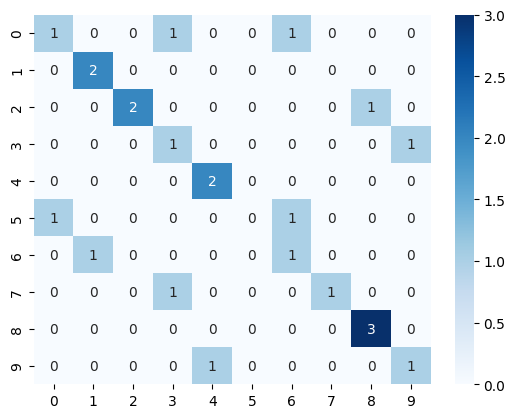

In [36]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

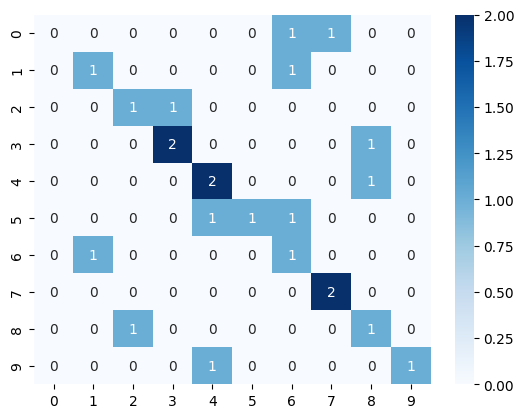

In [37]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

In [ ]:
# MODEL (10C_3)
metrics_df = pd.DataFrame(history.history)

In [ ]:
metrics_df.head()

loss  accuracy  val_loss  val_accuracy
0  2.405830  0.100000  2.450448      0.066667
1  2.341935  0.108333  2.313233      0.066667
2  2.274890  0.122222  2.260836      0.177778
3  2.222161  0.172222  2.239219      0.200000
4  2.206687  0.200000  2.285830      0.088889

<Axes: >

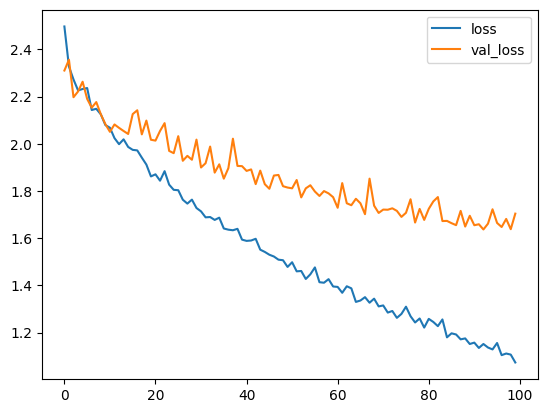

In [32]:
metrics_df[["loss","val_loss"]].plot()

<Axes: >

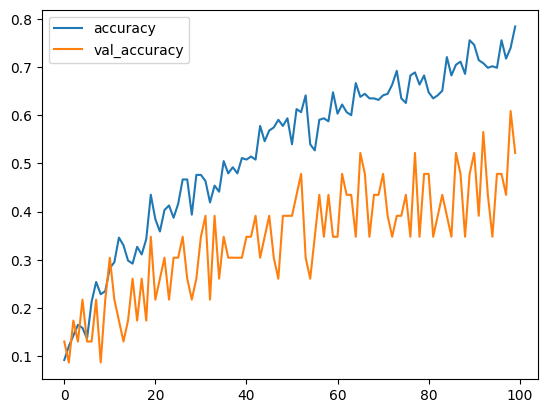

In [33]:
metrics_df[["accuracy","val_accuracy"]].plot()

In [30]:
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [31]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.6086956521739131
Test Accuracy: 0.5217391304347826
Validation Precision: 0.5978260869565217
Test Precision: 0.5652173913043478
Validation Recall: 0.6086956521739131
Test Recall: 0.5217391304347826
Validation F1-score: 0.5784679089026915
Test F1-score: 0.504968944099379


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [64]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.6521739130434783
Test Accuracy: 0.43478260869565216
Validation Precision: 0.6594202898550724
Test Precision: 0.39855072463768115
Validation Recall: 0.6521739130434783
Test Recall: 0.43478260869565216
Validation F1-score: 0.6289855072463768
Test F1-score: 0.4028985507246377


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

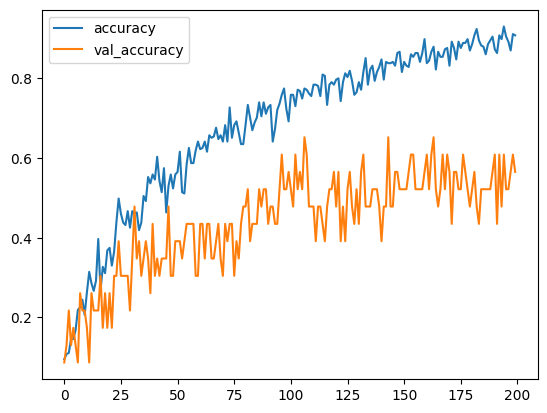

In [56]:
resultant_df[["accuracy","val_accuracy"]].plot()

<Axes: >

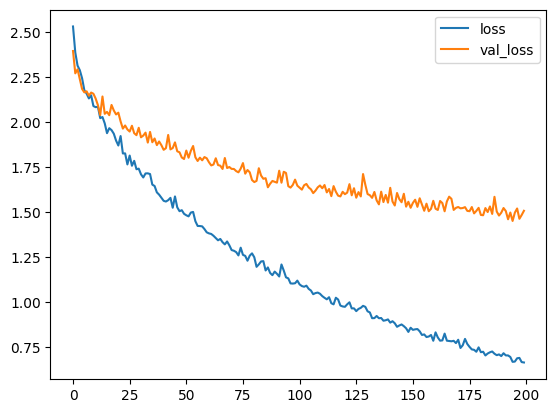

In [57]:
resultant_df[["loss","val_loss"]].plot()

In [61]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Res50_10C_3.keras')

In [58]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

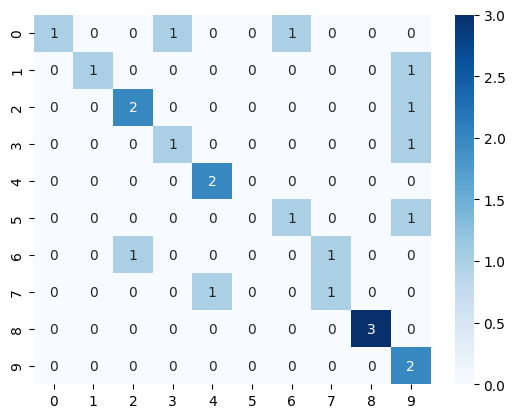

In [65]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

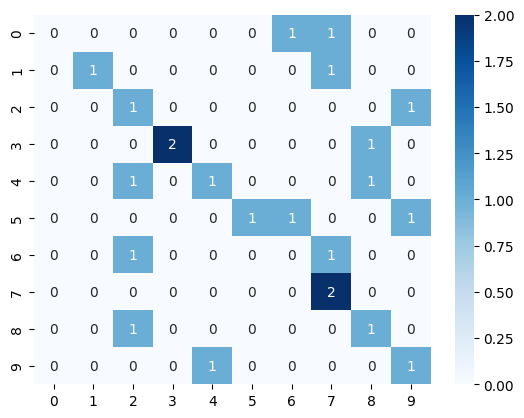

In [66]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

In [29]:
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Res50_10C_1.keras')

In [39]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.5652173913043478
Test Accuracy: 0.4782608695652174
Validation Precision: 0.5637681159420289
Test Precision: 0.4579710144927536
Validation Recall: 0.5652173913043478
Test Recall: 0.4782608695652174
Validation F1-score: 0.5297101449275362
Test F1-score: 0.44989648033126306


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# train_dir = r'C:\Users\revan\Documents\FYP_HWU\extracted_features\training_val_Res50_10C_3.csv'
# # metrics_df.to_csv(log_dir)
# metrics_df.to_csv(train_dir, index=False)

### ResNet50 + BiLSTM

In [ ]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
# hybrid_model.load_weights(os.path.join(log_dir,"ckpt.Res50_Bi_10C_2.keras"))
folder_path = os.path.join(log_dir,"ckpt.Res50_Bi_10C_2model.keras")
model=load_model(folder_path)
# hybrid_model.save(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Res50_Bi_10C_2model.keras')

In [377]:
# For validation set
y_pred_val = np.argmax(model.predict(X_val, batch_size = 2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size = 2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [354]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.7391304347826086
Test Accuracy: 0.5217391304347826
Validation Precision: 0.8550724637681159
Test Precision: 0.5478260869565217
Validation Recall: 0.7391304347826086
Test Recall: 0.5217391304347826
Validation F1-score: 0.7405797101449274
Test F1-score: 0.510351966873706


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [378]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.6956521739130435
Test Accuracy: 0.5217391304347826
Validation Precision: 0.8173913043478261
Test Precision: 0.6028985507246377
Validation Recall: 0.6956521739130435
Test Recall: 0.5217391304347826
Validation F1-score: 0.7004140786749481
Test F1-score: 0.5159420289855072


In [335]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.6956521739130435
Test Accuracy: 0.5217391304347826
Validation Precision: 0.8173913043478261
Test Precision: 0.6028985507246377
Validation Recall: 0.6956521739130435
Test Recall: 0.5217391304347826
Validation F1-score: 0.7004140786749481
Test F1-score: 0.5159420289855072


In [340]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.782608695652174
Test Accuracy: 0.5217391304347826
Validation Precision: 0.8405797101449275
Test Precision: 0.5623188405797102
Validation Recall: 0.782608695652174
Test Recall: 0.5217391304347826
Validation F1-score: 0.7753623188405797
Test F1-score: 0.500207039337474


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [355]:
metrics_df1 = pd.DataFrame(history2_1.history)

<Axes: >

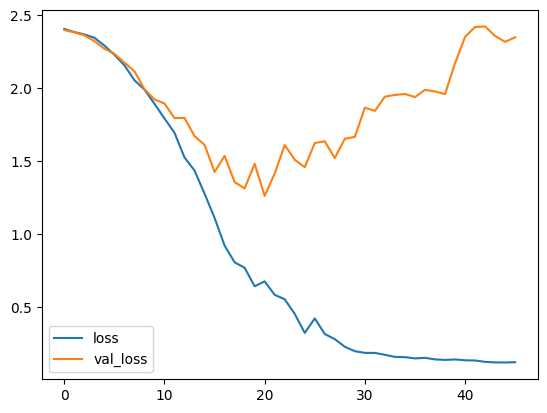

In [356]:
metrics_df1[["loss","val_loss"]].plot()

<Axes: >

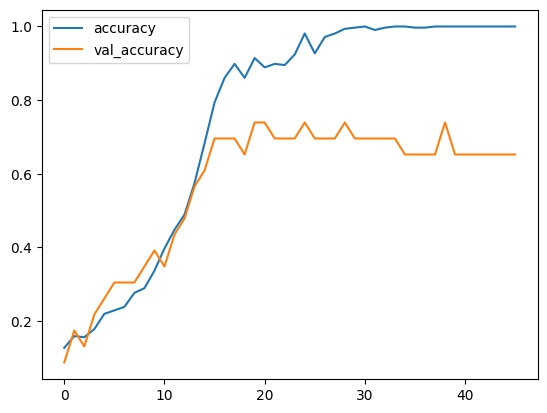

In [357]:
metrics_df1[["accuracy","val_accuracy"]].plot()

In [341]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

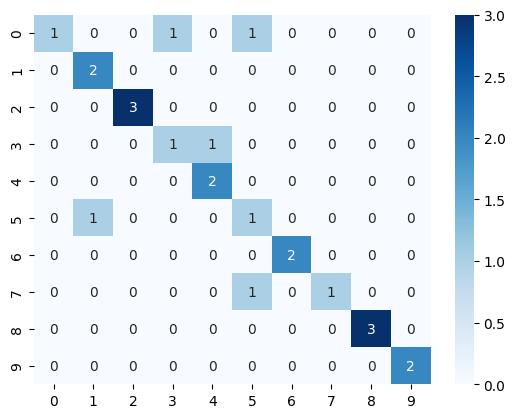

In [342]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

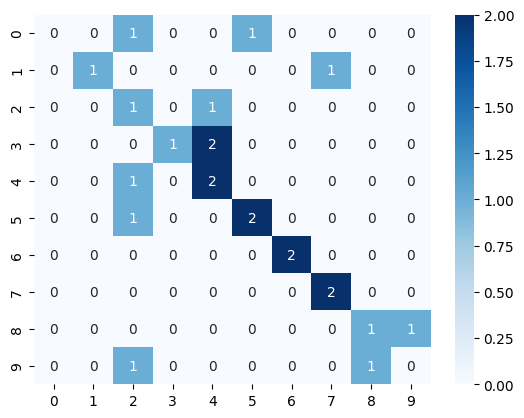

In [343]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

In [345]:
hybrid_model.save_weights(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Res50_Bi_10C_2.keras')

### Xception + BiLSTM

In [273]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.X_Bi_10C_3.keras")
model=load_model(folder_path)

In [274]:
# For validation set
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [234]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.6956521739130435
Test Accuracy: 0.5652173913043478
Validation Precision: 0.6579710144927536
Test Precision: 0.6811594202898551
Validation Recall: 0.6956521739130435
Test Recall: 0.5652173913043478
Validation F1-score: 0.6514492753623189
Test F1-score: 0.5803312629399585


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [276]:
metrics_df = pd.DataFrame(history1.history)
# metrics_df1 = metrics_df.head(40)

<Axes: >

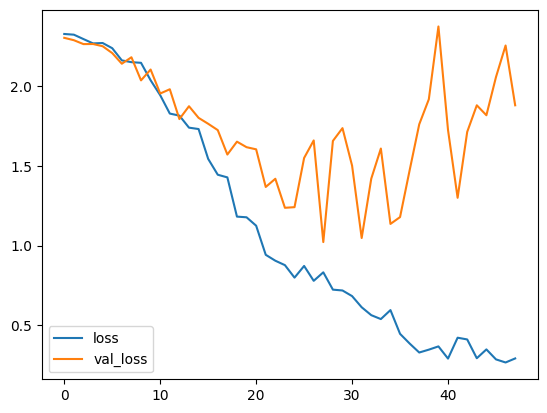

In [278]:
metrics_df[["loss","val_loss"]].plot()

<Axes: >

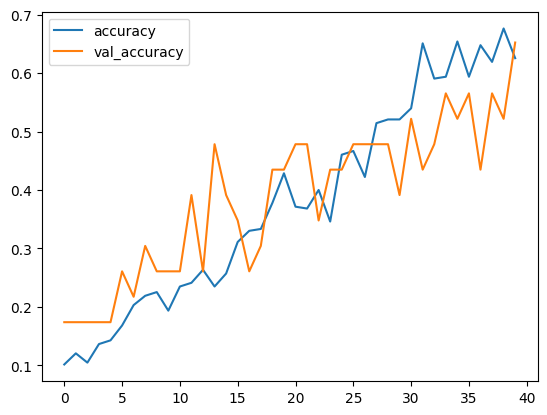

In [245]:
metrics_df[["accuracy","val_accuracy"]].plot()

In [237]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

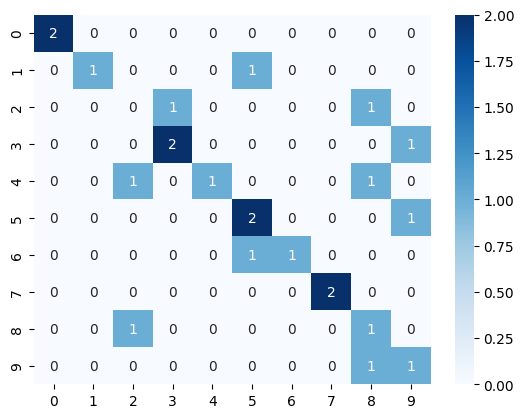

In [238]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

<Axes: >

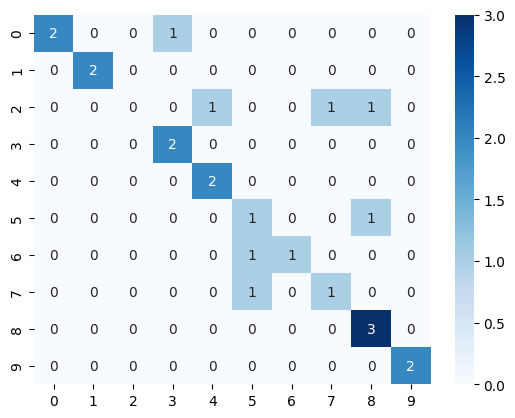

In [239]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

### Xception (Alone)

In [61]:
# Epoch results
epoch_results = {
    "Epoch": list(range(1, 11)),  # Assuming you have 16 epochs
    "loss": [4.6342, 0.5936,  0.2700, 0.1015, 0.0394, 0.0396, 0.0308, 0.0355, 0.0049, 0.0017],
    "accuracy": [0.2667, 0.8254, 0.9270, 0.9619, 0.9937, 0.9937, 0.9905, 0.9937, 1.0000, 1.0000],
    "val_loss": [2.1861, 1.4589, 1.6042, 1.3188, 1.6469, 1.2163, 1.1989, 1.0660, 1.3084, 1.2984],
    "val_accuracy": [0.4783, 0.7826, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522, 0.6522]
}

# Convert to DataFrame
metrics_df0 = pd.DataFrame(epoch_results)

In [68]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Xception_10C_3.keras")
hybrid_model1=load_model(folder_path)

In [69]:
# For validation set
y_pred_val = np.argmax(hybrid_model1.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(hybrid_model1.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [70]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.8260869565217391
Test Accuracy: 0.4782608695652174
Validation Precision: 0.7934782608695652
Test Precision: 0.5579710144927535
Validation Recall: 0.8260869565217391
Test Recall: 0.4782608695652174
Validation F1-score: 0.7900621118012422
Test F1-score: 0.46376811594202894


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [229]:
hybrid_model1.save_weights(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\ckpt.Xception_10C_1.keras')

In [89]:
metrics_df = pd.DataFrame(history.history)

In [99]:
metrics_df1 = pd.DataFrame(history.history) 

In [100]:
resultant_df = pd.concat([metrics_df, metrics_df1], axis=0, ignore_index=True)
# sub_df = resultant_df.head(30)

In [107]:
metrics_df.shape

(10, 4)

<Axes: >

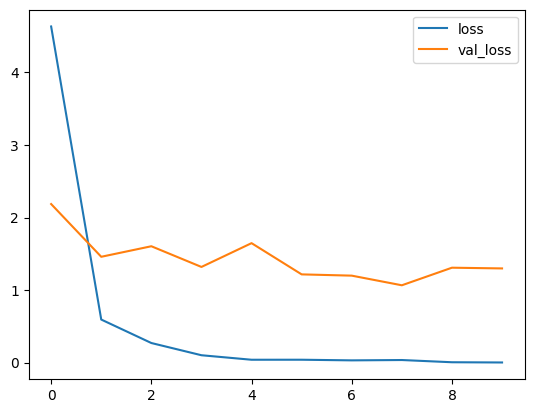

In [63]:
metrics_df0[["loss","val_loss"]].plot()

<Axes: >

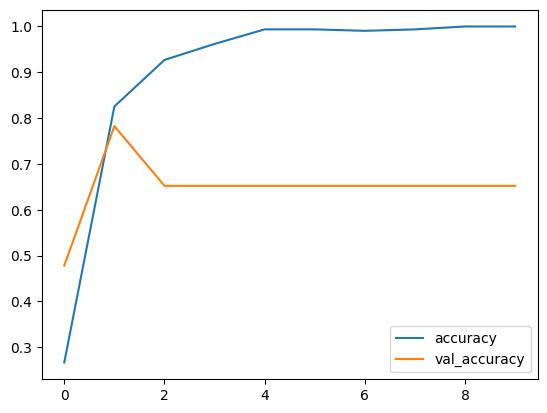

In [64]:
metrics_df0[["accuracy","val_accuracy"]].plot()

In [71]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

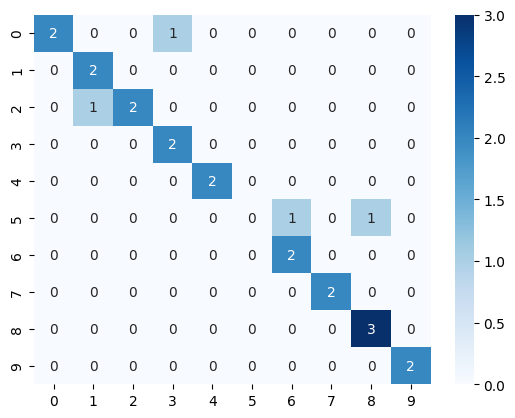

In [72]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

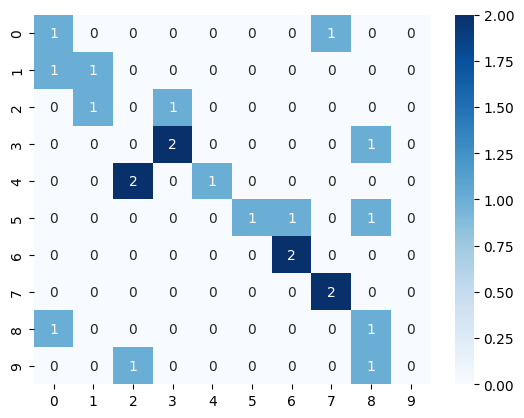

In [74]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

# Top 50 videos (WLASL-50)

### Creating Subset (Top 50 classes)

In [ ]:
top100words = ['book','drink','computer','before','chair','go','clothes','who','candy','cousin','deaf','fine','help',
'no','thin','walk','year','yes','all','black','cool','finish','hot','like','many','mother','now','orange','table',
'thanksgiving','what','woman','bed','blue','bowling','can','dog','family','fish','graduate','hat','hearing','kiss',
'language','later','man','shirt','study','tall','white','wrong','accident','apple','bird','change','color','corn',
'cow','dance','dark','doctor','eat','enjoy','forget','give','last','meet','pink','pizza','play','school','secretary',
'short','time','want','work','africa','basketball','birthday','brown','but','cheat','city','cook','decide','full',
'how','jacket','letter','medicine','need','paint','paper','pull','purple','right','same','son','tell','thursday'
]

In [ ]:
top10words = top100words[:20]

In [ ]:
print(top10words)

['book', 'drink', 'computer', 'before', 'chair', 'go', 'clothes', 'who', 'candy', 'cousin', 'deaf', 'fine', 'help', 'no', 'thin', 'walk', 'year', 'yes', 'all', 'black']


In [ ]:
# Initializing the path of the dataset
src_path = r'D:\WLASL Datasets\Kaggle_WLASL_withVideosInClassFolders\dataset\SL'
top100videos = r'D:\FYP_HWU\WLASL100\Videos_100'
dest_path = r'D:\FYP_HWU\WLASL20\Videos'

In [ ]:
import shutil
import os

In [ ]:
# Making directories for 10 classes in dest path
# Creating one folder for each action
for action in top10words:
    try:
        os.makedirs(os.path.join(dest_path, action))
    except:
        pass

In [ ]:
# Moving all videos from source dir to dest dir
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(src_path):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        if (i in top10words): #if the keyword is present in the shortlisted list of actions
                files = os.listdir(os.path.join(src_path, i)) #get files
                for file in files:
                    full_file_name = os.path.join(src_path, i, file) #add file name to the source path
                    shutil.copy(full_file_name, os.path.join(dest_path,i))   # copy file to dest path  
    break


In [ ]:
# Counting videos in each class
# Initializing variables
video_count = {}

# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(top100videos):
    for i in dirs: #loop through each of the keywords or actions in the dataset
        for root, dirs, files in os.walk(os.path.join(top100videos, i)):
            video_count[i] = len(files) #get the number of videos per class and append to the dictionary
            break
    break

print(video_count)

{'accident': 13, 'africa': 9, 'all': 8, 'apple': 11, 'basketball': 12, 'bed': 13, 'before': 16, 'bird': 10, 'birthday': 6, 'black': 10, 'blue': 8, 'book': 6, 'bowling': 13, 'brown': 8, 'but': 7, 'can': 9, 'candy': 13, 'chair': 7, 'change': 12, 'cheat': 10, 'city': 9, 'clothes': 5, 'color': 8, 'computer': 14, 'cook': 8, 'cool': 16, 'corn': 12, 'cousin': 17, 'cow': 9, 'dance': 7, 'dark': 12, 'deaf': 11, 'decide': 9, 'doctor': 11, 'dog': 11, 'drink': 15, 'eat': 7, 'enjoy': 8, 'family': 11, 'fine': 9, 'finish': 9, 'fish': 10, 'forget': 7, 'full': 12, 'give': 13, 'go': 15, 'graduate': 10, 'hat': 9, 'hearing': 8, 'help': 14, 'hot': 10, 'how': 9, 'jacket': 7, 'kiss': 10, 'language': 10, 'last': 12, 'later': 12, 'letter': 11, 'like': 7, 'man': 12, 'many': 10, 'medicine': 8, 'meet': 9, 'mother': 11, 'need': 7, 'no': 11, 'now': 9, 'orange': 10, 'paint': 7, 'paper': 8, 'pink': 10, 'pizza': 12, 'play': 11, 'pull': 9, 'purple': 8, 'right': 9, 'same': 9, 'school': 9, 'secretary': 10, 'shirt': 12, 's

In [ ]:
len(video_count)

100

In [ ]:
video_count1 = sorted(video_count.items(), key=lambda x:x[1], reverse = True)  
# sorting the dictionary based on the number of videos and reversing it to arrange in s=descending order

In [ ]:
first_50_items={}
# getting the top 11 classes
for idx, k in enumerate(video_count1):
    if idx == 50: break
    first_50_items[k[0]] = k[1]

print(first_50_items)

{'cousin': 17, 'before': 16, 'cool': 16, 'thin': 16, 'drink': 15, 'go': 15, 'computer': 14, 'help': 14, 'who': 14, 'accident': 13, 'bed': 13, 'bowling': 13, 'candy': 13, 'give': 13, 'short': 13, 'tall': 13, 'thanksgiving': 13, 'basketball': 12, 'change': 12, 'corn': 12, 'dark': 12, 'full': 12, 'last': 12, 'later': 12, 'man': 12, 'pizza': 12, 'shirt': 12, 'what': 12, 'yes': 12, 'apple': 11, 'deaf': 11, 'doctor': 11, 'dog': 11, 'family': 11, 'letter': 11, 'mother': 11, 'no': 11, 'play': 11, 'thursday': 11, 'walk': 11, 'woman': 11, 'bird': 10, 'black': 10, 'cheat': 10, 'fish': 10, 'graduate': 10, 'hot': 10, 'kiss': 10, 'language': 10, 'many': 10}


In [ ]:
video_paths = {} #declaring an empty dictionary to store the file paths
DATA_PATH = r'D:\FYP_HWU\WLASL20\Videos'
# Creating a dictionary for all the actions/classes along with the count of videos for each action in the dataset
for root, dirs, files in os.walk(DATA_PATH):
    for action in dirs:  # accessing files and folders under each class
        for root, dirs, files in os.walk(os.path.join(DATA_PATH, action)):
            videos = []
            for i in range (len(files)):    # iterating through videos in the class folder
                videos.append(os.path.join(DATA_PATH, action, files[i])) #storing video paths in the dictionary
            video_paths[action] = videos

    break

In [ ]:
len(video_paths)

10

In [ ]:
# Creating folders to store frames

#Creating folder 'NEW_Frames' that will contain all the video frames
DATA_PATH = r'D:\FYP_HWU\WLASL20\NEW_FRAMES'
os.makedirs(DATA_PATH)

#Creating one folder for each action
for action in video_paths.keys():
    # 1 folder for each video of the action
    for sequence in range(len(video_paths[action])):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
len(video_paths)

10

In [ ]:
# storing the file paths (video paths) in a csv file
df = pd.DataFrame.from_dict(video_paths, orient='index')
df = df.transpose()
df.to_csv(r'D:\FYP_HWU\WLASL50\video_paths_50.csv', index=False)

### Frame Extraction

In [ ]:
# Deciding how many frames to extract?
count = []
for action in video_paths.keys():
        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])
            total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            count.append(total_frames)
            cap.release()

In [ ]:
cap = cv2.VideoCapture(r'C:/Users/revan/Documents/FYP_HWU/Videos_100/yes/69546.mp4')
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
cap.release()
print(total_frames)

72.0


In [ ]:
max(count)

195.0

In [ ]:
min(count)

24.0

In [ ]:
video_paths[action][sequence]

'C:\\Users\\revan\\Documents\\FYP_HWU\\Videos_100\\yes\\69546.mp4'

In [ ]:
DATA_PATH = r'D:\FYP_HWU\WLASL20\NEW_FRAMES'

In [ ]:
print(video_paths.keys())

dict_keys(['bed', 'cousin', 'dark', 'deaf', 'doctor', 'drink', 'help', 'mother', 'walk', 'what'])


In [ ]:
# This function determines the frames to be skipped to extract frames from videos of variable lengths.
def frameSkipping(DATA_PATH,video_paths, n):
    for action in video_paths.keys():

        #Looping through each video of the action
        for sequence in range(len(video_paths[action])):
            cap = cv2.VideoCapture(video_paths[action][sequence])
            if cap.isOpened():
                total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)  #getting the total frame count
                frames_step = total_frames//n    # getting the number of frames to skip

                for frame_num in range(n):
                    #position the pointer to the frame after skipping frames
                    cap.set(1,frame_num*frames_step)
                    success,image = cap.read()
                    #save the image
                    if success:
                        cv2.imwrite(os.path.join(DATA_PATH, action, str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)
                    else:
                        print("Error in saving " + str(video_paths[action][sequence]))
            cap.release()

In [ ]:
frameSkipping(DATA_PATH, video_paths, 20)

In [ ]:
removeKeys = ['accident', 'africa', 'all', 'apple', 'basketball', 'bed', 'before', 'bird', 'birthday', 'black', 'blue']
for key in removeKeys:
    del video_paths[key]

### Frame Resizing

In [ ]:
# Cropping the center of the image (cropping out the extra background margins of the video.)
def crop_center_square(frame): # takes image as a parameter
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y:start_y+min_dim,start_x:start_x+min_dim]

In [ ]:
# Function to resize the frames
def resizeFrames(new_image, resize): # takes numpy array as parameter
    new_image = crop_center_square(new_image)
    new_image = cv2.resize(new_image, resize)
    return new_image # returns a numpy array

In [ ]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for action in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, action)):
                finalVideoCount[action] = len(dirs)
                break
    return finalVideoCount

In [ ]:
max_fc = 20
resize = (224,224)
AUG_PATH = r'D:\FYP_HWU\WLASL20\AUG_FRAMES'
DATA_PATH = r'D:\FYP_HWU\WLASL20\NEW_FRAMES'

videoCount = totalVideoCount(DATA_PATH) #getting a video count from original frame dataset
# os.makedirs(AUG_PATH)

#looping through each action
for action in videoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(videoCount[action]):

        #creating a folder in AUG frames folder
        try:
            os.makedirs(os.path.join(AUG_PATH, action, str(sequence)))
        except:
            pass

        # iterating through each frame in the original frame dataset
        for frame_num in range (max_fc):
            IMAGE_PATH = os.path.join(DATA_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

            # Reading the image
            image = cv2.imread(IMAGE_PATH)

            new_image = resizeFrames(image, resize)

            #Saving the image in the folder created
            cv2.imwrite(os.path.join(AUG_PATH, str(action), str(sequence), 'frame' + str(frame_num) + '.jpg'), new_image)

            # Displaying Image
            cv2.destroyAllWindows()


In [ ]:
video_count1 = sorted(videoCount.items(), key=lambda x:x[1], reverse = True)  #sorting the dictionary based on the number of videos and reversing it to arrange in s=descending order

In [ ]:
video_count1[-1]

('walk', 11)

### Data Augmentation

In [ ]:
def blackAndWhite(image): # takes image as a parameter
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(0)

    # return np.array(new_image)
    return new_image

In [ ]:
def saturation(image): # takes image as a parameter
    # Horizontally flipping the image
    image = flipImage(image)
    # Image color
    enhancer = ImageEnhance.Color(image)
    new_image = enhancer.enhance(1.5)

    # return np.array(new_image)
    return new_image

In [ ]:
def flipImage(image): # takes image as a parameter
    # Converting Image to numpy array
    new_image = np.array(image)

    # Horizontally flipping the image
    image = cv2.flip(new_image, 1)

    # Converting numpy aray to image format
    image = Image.fromarray(image.astype('uint8'))

    # Returning the image in image format
    return image

In [ ]:
def rotateImageLeft(image):
    image  = image.rotate(-8)  #- or + -> left or right
    return image

In [ ]:
def rotateImageRight(image):
    image  = image.rotate(+8)  #- or + -> left or right
    return image

In [ ]:
max_fc = 20  #maximum number of frames extracted per video
resize = (224,224) #dimensions to resize the image to
AUG_PATH = r'D:\FYP_HWU\WLASL20\AUG_FRAMES' # defining file path to store the video frames after data augmentation
DATA_PATH = r'D:\FYP_HWU\WLASL20\NEW_FRAMES'

finalVideoCount = totalVideoCount(AUG_PATH)
video_count = totalVideoCount(DATA_PATH)

#looping through each action
for action in video_count.keys():
    actionCount = finalVideoCount[action]

    #Looping through the count for videos for that action
    for sequence in range(video_count[action]):

        #creating a folder to store the augmented images
        folder_number = actionCount + sequence
        if(folder_number < 45):  # limiting number of videos under each class to be 25
            try:
                os.makedirs(os.path.join(AUG_PATH, action, str(folder_number)))
            except:
                pass #pass if the folder has already been created

            for frame_num in range (max_fc):
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                #Converting numpy array to Image
                image = Image.fromarray(image.astype('uint8'))

                # Applying the filters
                # new_image = blackAndWhite(image)
                # new_image = flipImage(image)
                new_image = saturation(image)
                # new_image = rotateImageLeft(image)
                # new_image = rotateImageRight(image)

                # Converting Image to numpy array
                new_image = np.array(new_image)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(AUG_PATH , str(action), str(folder_number), 'frame'+ str(frame_num) + '.jpg'), new_image)

                # Displaying Image
                cv2.destroyAllWindows()

        else:
            break

    print("{} done".format(action))

bed done
cousin done
dark done
deaf done
doctor done
drink done
help done
mother done
walk done
what done


In [ ]:
print(totalVideoCount(AUG_PATH))

{'bed': 45, 'cousin': 45, 'dark': 45, 'deaf': 45, 'doctor': 45, 'drink': 45, 'help': 45, 'mother': 45, 'walk': 45, 'what': 45}


In [ ]:
# max_fc = 20  #maximum number of frames extracted per video
# resize = (224,224) #dimensions to resize the image to
# for frame_num in range (max_fc):
#     IMAGE_PATH = os.path.join(r'D:\FYP_HWU\WLASL10\AUG_FRAMES\book\4', 'frame' + str(frame_num) + '.jpg')

#     # Reading the image
#     image = cv2.imread(IMAGE_PATH)

#     #Converting numpy array to Image
#     image = Image.fromarray(image.astype('uint8'))

#     # Applying the filters
#     # new_image = blackAndWhite(image)
#     # new_image = flipImage(image)
#     # new_image = saturation(image)
#     new_image = rotateImageRight(image)

#     # Converting Image to numpy array
#     new_image = np.array(new_image)

#     #Saving the image in the folder created
#     cv2.imwrite(os.path.join(r'D:\FYP_HWU\WLASL10\AUG_FRAMES\book\24', 'frame'+ str(frame_num) + '.jpg'), new_image)

#     cv2.destroyAllWindows()

### MediaPipe Keypoints

In [ ]:
import mediapipe as mp
# !pip3 install mediapipe --user

In [ ]:
mp_holistic = mp.solutions.holistic #Holistic model (use for detections)
mp_drawing = mp.solutions.drawing_utils #Drawing Utilities
drawing_spec = mp_drawing.DrawingSpec(thickness = 1, circle_radius=1)

In [ ]:
#Capturing landmarks
def mediapipeHolistics(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion -> BGR to RGB
    image.flags.writeable = False
    results = model.process(image) # Making Prediction
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion -> RGB to BGR
    return image, results

In [ ]:
#Visualize landmarks, connecting the landmarks on the image (drawing only pose and had landmarks)
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.pose_landmarks,
                              connections = mp_holistic.POSE_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.left_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)
    mp_drawing.draw_landmarks(image = image,
                              landmark_list = results.right_hand_landmarks,
                              connections = mp_holistic.HAND_CONNECTIONS,
                              landmark_drawing_spec = drawing_spec,
                              connection_drawing_spec = drawing_spec)

In [ ]:
# finalVideoCount = totalVideoCount(AUG_PATH)
actions = list(finalVideoCount.keys())
remaining_actions = actions[1:]
print(remaining_actions)

['book', 'candy', 'chair', 'clothes', 'computer', 'cousin', 'drink', 'go', 'who']


In [ ]:
max_fc = 20
AUG_PATH = r'D:\FYP_HWU\WLASL20\AUG_FRAMES'
MP_FRAMES_PATH = r'D:\FYP_HWU\WLASL20\MP_FRAMES'

finalVideoCount = totalVideoCount(AUG_PATH)
os.makedirs(MP_FRAMES_PATH)

#looping through each action
for action in finalVideoCount.keys():

    #Looping through the count for videos for that action
    for sequence in range(finalVideoCount[action]):

        # Creating folders to store frames and extracted landmarks
        try:
            os.makedirs(os.path.join(MP_FRAMES_PATH, action, str(sequence)))
        except:
            pass

        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            for frame_num in range (max_fc):

                # Getting the extracted frame from the folder
                IMAGE_PATH = os.path.join(AUG_PATH, str(action), str(sequence) , 'frame' + str(frame_num) + '.jpg')

                # Reading the image
                image = cv2.imread(IMAGE_PATH)

                # Making detection
                image, result = mediapipeHolistics(image, holistic)

                #Darwing landmarks on frames
                draw_landmarks(image,result)

                #Saving the image in the folder created
                cv2.imwrite(os.path.join(MP_FRAMES_PATH , str(action), str(sequence), 'frame'+ str(frame_num) + '.jpg'), image)

                # Displaying Image
                cv2.destroyAllWindows()
    print("{} done".format(action))


bed done
cousin done
dark done
deaf done
doctor done
drink done
help done
mother done
walk done
what done


### Creating Dataset

In [ ]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# tf.config.list_physical_devices('GPU')

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16273871610509814419
]


In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# !pip3 install --upgrade tensorflow-gpu
!nvidia-smi

Sat Apr  6 13:15:10 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.61                 Driver Version: 551.61         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8              1W /   75W |      90MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Splitting data in 80:10:10 train:validation:test ratio
def trainTestSplit(X,y):
    x_train, x_temp, y_train, y_temp= train_test_split(X, y, test_size=0.2, random_state=42)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state=42)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [ ]:
# Getting the final number of videos under each Action
def totalVideoCount(DATA_PATH):
    finalVideoCount = {}
    for root, dirs, files in os.walk(DATA_PATH):
        for action in dirs:
            for root, dirs, files in os.walk(os.path.join(DATA_PATH, action)):
                finalVideoCount[action] = len(dirs)
                break
    return finalVideoCount

In [ ]:
# Initializing data path
DATA_PATH = r'C:\Users\revan\Documents\FYP_HWU\NEW_MP_Frames'

In [ ]:
# Getting the final number of videos under each Action
total_video_count = totalVideoCount(DATA_PATH)
# subset_video_count = {}
# for word in top10words:
#     subset_video_count[word] = total_video_count[word]

# print(subset_video_count)
print(total_video_count)

{'accident': 45, 'bed': 45, 'call': 45, 'child': 45, 'cousin': 45, 'danger': 45, 'dark': 45, 'deaf': 45, 'doctor': 45, 'drink': 45, 'follow': 45, 'help': 45, 'man': 45, 'mother': 45, 'murder': 45, 'police': 45, 'sick': 45, 'walk': 45, 'what': 45, 'woman': 45}


In [ ]:
print(len(total_video_count))

20


In [ ]:
# Setting numeric labels for non numeric action category values
label_map = {label:num for num, label in enumerate(total_video_count.keys())} #subset of classes

In [ ]:
# Converting frames from BGR to RGB format and normalizing pixel values
def frameEnhance(frame):
    # Converting BGR -> RGB
    frame = frame[:, :, [2, 1, 0]]
    # Normalize the pixel values
    frame = frame / 255.0
    return frame

In [ ]:
# Adding videos to list (grouping the 20 frames in a list) 
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in total_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):

        # Declaring a list to store the frames of each video
        frames = []

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            frames.append(frame)

        # Adding to the dataset
        videoFrames.append(frames)
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action accident done
Action bed done
Action call done
Action child done
Action cousin done
Action danger done
Action dark done
Action deaf done
Action doctor done
Action drink done
Action follow done
Action help done
Action man done
Action mother done
Action murder done
Action police done
Action sick done
Action walk done
Action what done
Action woman done


In [ ]:
# Adding individual frames to list for feature extraction
max_fc = 20
videoFrames=[]
videolabels=[]

# Iterating through each action
for action in total_video_count.keys():

    # Iterting through each video in the action
    for sequence in range(total_video_count[action]):

        # Iterating through each frame
        for frame_num in range(max_fc):

            # Loading the image frame
            frame = cv2.imread(os.path.join(DATA_PATH, action, str(sequence), "frame{}".format(frame_num) + ".jpg"))
            frame = frameEnhance(frame)

            # Appending to the list
            videoFrames.append(frame)

        # Adding to the dataset
        videolabels.append(label_map[action])

    print("Action {} done".format(action))
cv2.destroyAllWindows()

Action accident done
Action apple done
Action basketball done
Action bed done
Action before done
Action bird done
Action black done
Action bowling done
Action candy done
Action change done
Action cheat done
Action computer done
Action cool done
Action corn done
Action cousin done
Action dark done
Action deaf done
Action doctor done
Action dog done
Action drink done
Action family done
Action fish done
Action full done
Action give done
Action go done
Action graduate done
Action help done
Action hot done
Action kiss done
Action language done
Action last done
Action later done
Action letter done
Action man done
Action many done
Action mother done
Action no done
Action pizza done
Action play done
Action shirt done
Action short done
Action tall done
Action thanksgiving done
Action thin done
Action thursday done
Action walk done
Action what done
Action who done
Action woman done
Action yes done


In [ ]:
len(videoFrames)

900

In [ ]:
X = np.array(videoFrames)

In [ ]:
# The below code will convert the target class to this format: [1,0,0], [0,1,0], [0,0,1]
y_labels = to_categorical(videolabels).astype(int)

### Model Architecture and Training

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Dropout, LSTM, Bidirectional, Input, BatchNormalization, GlobalAveragePooling2D, Activation, GlobalMaxPool2D, Concatenate, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from keras.callbacks import LearningRateScheduler
# from keras.optimizers import Adam, RMSprop, SVM
from tensorflow.keras.optimizers import Adam, RMSprop

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [ ]:
# defining path to store model weights
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'

In [ ]:
# defining a function to save the weights of best model
folder_path = os.path.join(log_dir,"ckpt.X_20C_1.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

#### Xception model

In [ ]:
Xnet_model=tf.keras.applications.Xception(weights='imagenet',include_top=False, input_shape = (224, 224, 3))

# Freeze the ResNet50 layers
for layer in Xnet_model.layers:
    layer.trainable = False

# Input layer for the video frames
input_frames = Input(shape=(20, 224, 224, 3))

# Apply TimeDistributed to the ResNet50 base
Xnet_output = TimeDistributed(Xnet_model)(input_frames)

# Global Average Pooling layer to reduce spatial dimensions
global_avg_pool = TimeDistributed(GlobalAveragePooling2D())(Xnet_output)

# Fully connected layers for video-level classification
dense_layer = (Flatten())(global_avg_pool)
# dense_layer = Dense(32, activation='relu')(dense_layer)
dense_layer = Dropout(0.5)(dense_layer)
dense_layer = BatchNormalization()(dense_layer)
output_layer = Dense(20, activation='softmax')(dense_layer) 

# Create the final model
hybrid_model1 = tf.keras.models.Model(inputs=input_frames, outputs=output_layer)



In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y_labels)

In [ ]:
X_test.shape

(90, 20, 224, 224, 3)

In [ ]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [ ]:
with tf.device('/cpu:0'):
   x_v = tf.convert_to_tensor(X_val, np.float32)
   y_v = tf.convert_to_tensor(y_val, np.float32)

In [ ]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = hybrid_model1.fit(x, y, epochs=30, batch_size=8, validation_data=(X_val, y_val), callbacks=[checkpoint, earlyStopping])

Epoch 1/30
90/90 [==============================] - 89s 817ms/step - loss: 3.6570 - accuracy: 0.3833 - val_loss: 1.6421 - val_accuracy: 0.5444


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/30
90/90 [==============================] - 57s 630ms/step - loss: 0.6793 - accuracy: 0.8333 - val_loss: 1.1915 - val_accuracy: 0.7111
Epoch 3/30
90/90 [==============================] - 56s 626ms/step - loss: 0.2953 - accuracy: 0.9236 - val_loss: 0.6953 - val_accuracy: 0.8444
Epoch 4/30
90/90 [==============================] - 56s 628ms/step - loss: 0.2322 - accuracy: 0.9361 - val_loss: 0.5767 - val_accuracy: 0.8778
Epoch 5/30
90/90 [==============================] - 56s 625ms/step - loss: 0.2280 - accuracy: 0.9361 - val_loss: 1.5734 - val_accuracy: 0.7667
Epoch 6/30
90/90 [==============================] - 56s 626ms/step - loss: 0.2319 - accuracy: 0.9500 - val_loss: 1.9267 - val_accuracy: 0.7778
Epoch 7/30
90/90 [==============================] - 56s 626ms/step - loss: 0.2568 - accuracy: 0.9417 - val_loss: 1.1968 - val_accuracy: 0.8222
Epoch 8/30
90/90 [==============================] - 56s 625ms/step - loss: 0.2406 - accuracy: 0.9403 - val_loss: 1.7825 - val_accuracy: 0.8000

#### Xception + BiLSTM

In [ ]:
# extracting features from each frame using a pretrained model
def fe_PretrainedM(df, pretrained_model):
    fe_video = []
    count = 1
    for frame in df:
            features = extract_features(frame, pretrained_model)
            fe_video.append(features) 
            print(count)
            count+=1
            
    # return fe_video, new_y
    return fe_video


In [ ]:
def extract_features(frame, model):
    img = np.expand_dims(frame, axis=0)  # Add batch dimension
    features = model.predict(img, verbose = 1)  # Extract features
    return features.flatten()  # Flatten the features

In [ ]:
# RESNET Model (for feature extraction)
# Load pre-trained ResNet50 without the top (fully connected) layers
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling="avg")

# Freeze the ResNet50 layers
for layer in resnet_model.layers:
    layer.trainable = False

# Create the final model
hybrid_model = tf.keras.models.Model(inputs=resnet_model.input, outputs=resnet_model.output)



In [ ]:
# hybrid_model.summary()

In [ ]:
fe_video = fe_PretrainedM(X, hybrid_model)

features_df = pd.DataFrame(fe_video)
labels_df = pd.DataFrame(y_labels)


1/1 [==============================] - 9s 9s/step
1
1/1 [==============================] - 0s 17ms/step
2
1/1 [==============================] - 0s 20ms/step
3
1/1 [==============================] - 0s 18ms/step
4
1/1 [==============================] - 0s 18ms/step
5
1/1 [==============================] - 0s 22ms/step
6
1/1 [==============================] - 0s 17ms/step
7
1/1 [==============================] - 0s 16ms/step
8
1/1 [==============================] - 0s 16ms/step
9
1/1 [==============================] - 0s 17ms/step
10
1/1 [==============================] - 0s 13ms/step
11
1/1 [==============================] - 0s 19ms/step
12
1/1 [==============================] - 0s 19ms/step
13
1/1 [==============================] - 0s 13ms/step
14
1/1 [==============================] - 0s 21ms/step
15
1/1 [==============================] - 0s 19ms/step
16
1/1 [==============================] - 0s 18ms/step
17
1/1 [==============================] - 0s 19ms/step
18
1/1 [================

In [ ]:
# Save the DataFrame to a CSV file
fe_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_50C_features.csv'
labels_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_50C_labels.csv'
features_df.to_csv(fe_csv, index=False)
labels_df.to_csv(labels_csv, index=False)

In [ ]:
features_df.shape

(38000, 2048)

In [ ]:
# Reading the csv files
fe_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_50C_features.csv'
labels_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\X_50C_labels.csv'

X = pd.read_csv(fe_csv)
X_arr = X.to_numpy()

y_labels = pd.read_csv(labels_csv)
y_labels = y_labels.to_numpy()

In [ ]:
X_arr.shape

(6900, 2048)

In [ ]:
# grouping every 20 frames to form  a video
def frames_to_video(X_arr):
    fr_count = 0
    X_df = []
    video = []
    max_frames = X_arr.shape[0]

    while(fr_count<max_frames):
        for i in range(19):
            video.append(X_arr[fr_count])
            fr_count+=1
        X_df.append(video)
        video = []

    return X_df


In [ ]:
X_df = frames_to_video(X_arr)
X_total = np.array(X_df)

In [ ]:
X_val.shape

(200, 19, 2048)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X_total, y_labels)

In [ ]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [ ]:
# XCEPTION Model (for feature extraction)
xception_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling="avg")

# Freeze the Xception layers
for layer in xception_model.layers:
    layer.trainable = False

# Create the final model
hybrid_model3 = tf.keras.models.Model(inputs=xception_model.input, outputs=xception_model.output)


In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# # l2_reg = 0.001  # You can adjust this value as needed

# input_frames = Input(shape=(19, 2048))

# bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
# bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# # Add L2 regularization to the dense layers
# # dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(bilstm_output)
# # dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(dense_layer)
# dense_layer = Dense(64, activation='relu')(bilstm_output)
# dense_layer = Dropout(0.2)(dense_layer)
# dense_layer = Dense(32, activation='relu')(dense_layer)
# dense_layer = Dropout(0.3)(dense_layer)
# dense_layer = BatchNormalization()(dense_layer)

# output_layer = Dense(50, activation='softmax')(dense_layer)

# hybrid_model = Model(inputs=input_frames, outputs=output_layer)

In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout

input_frames = Input(shape=(19, 2048))

# Bidirectional LSTM layer
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(bilstm_output)
bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# Fully connected layers for video-level classification
# dense_layer = Dense(64, activation='relu')(bilstm_output)
# dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
# dense_layer = Dense(64, activation='relu')(dense_layer)
# dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(bilstm_output)  # Adding L2 regularization
dense_layer = Dropout(0.3)(dense_layer)
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dense_layer)  # Adding L2 regularization
dense_layer = Dropout(0.3)(dense_layer)
dense_layer = BatchNormalization()(dense_layer)
output_layer = Dense(50, activation='softmax')(dense_layer)  

# Create the final model
hybrid_model1 = Model(inputs=input_frames, outputs=output_layer)


In [ ]:
hybrid_model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 19, 2048)]        0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 19, 128)           1081856   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 19, 256)           263168    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                73984     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160

In [ ]:
# defining a function to save the weights of best model
folder_path = os.path.join(log_dir,"ckpt.X_Bi_50C_2.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model1.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history1 = hybrid_model1.fit(x, y, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks = [checkpoint])

Epoch 1/100
100/100 [==============================] - 2s 21ms/step - loss: 0.7397 - accuracy: 0.8231 - val_loss: 1.9080 - val_accuracy: 0.5800
Epoch 2/100
100/100 [==============================] - 2s 19ms/step - loss: 0.7934 - accuracy: 0.8050 - val_loss: 1.9307 - val_accuracy: 0.5650
Epoch 3/100
100/100 [==============================] - 2s 20ms/step - loss: 0.7945 - accuracy: 0.7894 - val_loss: 1.7969 - val_accuracy: 0.5900
Epoch 4/100
100/100 [==============================] - 2s 17ms/step - loss: 0.7330 - accuracy: 0.8100 - val_loss: 1.9830 - val_accuracy: 0.5650
Epoch 5/100
100/100 [==============================] - 2s 18ms/step - loss: 0.7487 - accuracy: 0.8075 - val_loss: 1.9484 - val_accuracy: 0.5450
Epoch 6/100
100/100 [==============================] - 2s 19ms/step - loss: 0.7366 - accuracy: 0.8194 - val_loss: 1.9493 - val_accuracy: 0.5750
Epoch 7/100
100/100 [==============================] - 2s 20ms/step - loss: 0.7225 - accuracy: 0.8175 - val_loss: 2.0382 - val_accuracy:

KeyboardInterrupt: 

#### ResNet + BiLSTM

In [ ]:
# defining path to store model weights
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'

In [ ]:
# defining a function to save the weights of best model
folder_path = os.path.join(log_dir,"ckpt.Res_Bi_50C_2.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min', restore_best_weights=True)

In [ ]:
# Reading the csv files
fe_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\Res50_50C_features.csv'
lb_csv = r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\Res50_50C_labels.csv'
X = pd.read_csv(fe_csv)
X_arr1 = X.to_numpy()

y_labels = pd.read_csv(lb_csv)
y_labels = y_labels.to_numpy()

In [ ]:
X_total1.shape

(2000, 19, 2048)

In [ ]:
def frames_to_video(X_arr):
    fr_count = 0
    X_df = []
    video = []
    max_frames = X_arr.shape[0]

    while(fr_count<max_frames):
        for i in range(19):
            video.append(X_arr[fr_count])
            fr_count+=1
        X_df.append(video)
        video = []

    return X_df


In [ ]:
X_df1 = frames_to_video(X_arr1)
X_total1 = np.array(X_df1)

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X_total1, y_labels)

In [ ]:
# import tensorflow as tf
with tf.device('/cpu:0'):
   x = tf.convert_to_tensor(X_train, np.float32)
   y = tf.convert_to_tensor(y_train, np.float32)

In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout

input_frames = Input(shape=(19, 2048))

# Bidirectional LSTM layer
bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
bilstm_output = Bidirectional(LSTM(128, return_sequences=True))(bilstm_output)
bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# Fully connected layers for video-level classification
dense_layer = Dense(64, activation='relu')(bilstm_output)
dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
dense_layer = Dense(64, activation='relu')(dense_layer)
dense_layer = Dropout(0.2)(dense_layer)  # Adding dropout
dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(dense_layer)  # Adding L2 regularization , kernel_regularizer=l2(0.001)
dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(dense_layer)  # Adding L2 regularization
output_layer = Dense(50, activation='softmax')(dense_layer)  

# Create the final model
hybrid_model = Model(inputs=input_frames, outputs=output_layer)


In [ ]:
hybrid_model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 19, 2048)]        0         
_________________________________________________________________
bidirectional_42 (Bidirectio (None, 19, 128)           1081856   
_________________________________________________________________
bidirectional_43 (Bidirectio (None, 19, 256)           263168    
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 64)                73984     
_________________________________________________________________
dense_66 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_32 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 64)                416

In [ ]:
# # l2_reg = 0.001  # You can adjust this value as needed

# input_frames = Input(shape=(19, 2048))

# bilstm_output = Bidirectional(LSTM(64, return_sequences=True))(input_frames)
# bilstm_output = Bidirectional(LSTM(32, return_sequences=False))(bilstm_output)

# # Add L2 regularization to the dense layers
# # dense_layer = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(bilstm_output)
# # dense_layer = Dense(32, activation='relu', kernel_regularizer=l2(l2_reg))(dense_layer)
# dense_layer = Dense(64, activation='relu')(bilstm_output)
# dense_layer = Dropout(0.2)(dense_layer)
# dense_layer = Dense(32, activation='relu')(dense_layer)
# dense_layer = Dropout(0.3)(dense_layer)
# dense_layer = BatchNormalization()(dense_layer)

# output_layer = Dense(50, activation='softmax')(dense_layer)

# hybrid_model = Model(inputs=input_frames, outputs=output_layer)

In [ ]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = hybrid_model.fit(x, y, epochs=100, batch_size=16, validation_data=(X_val, y_val), callbacks = [checkpoint])

#### ResNet50

In [ ]:
# defining path to store model weights
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'

In [46]:
# defining a function to save the weights of best model
folder_path = os.path.join(log_dir,"ckpt.Res50_20C_1.keras")

checkpoint = ModelCheckpoint(
        folder_path, save_best_only=True, monitor = "val_accuracy", mode = "max"
    )

earlyStopping = EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min', restore_best_weights=True)

In [47]:
# Load pre-trained ResNet50 without the top (fully connected) layers
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_model.layers:
    layer.trainable = False

# Input layer for the video frames
input_frames = Input(shape=(20, 224, 224, 3))

# Apply TimeDistributed to the ResNet50 base
resnet_output = TimeDistributed(resnet_model)(input_frames)

# Global Average Pooling layer to reduce spatial dimensions
global_avg_pool = TimeDistributed(GlobalAveragePooling2D())(resnet_output)

# Fully connected layers for video-level classification
dense_layer = (Flatten())(global_avg_pool)
# dense_layer = Dropout(0.2)(dense_layer)
# dense_layer = Dense(64, activation='relu')(dense_layer)
# dense_layer = Dense(128, activation='relu')(dense_layer)
# dense_layer = Dense(64, activation='relu')(dense_layer)
output_layer = Dense(20, activation='softmax')(dense_layer)  # Assuming 4 classes, adjust as needed

# Create the final model
hybrid_model2 = tf.keras.models.Model(inputs=input_frames, outputs=output_layer)


In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = trainTestSplit(X, y_labels)

In [48]:
# Compile the model (you can customize the optimizer, loss, and metrics)
hybrid_model2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = hybrid_model2.fit(x, y, epochs=250, batch_size=16, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/250
45/45 [==============================] - 45s 850ms/step - loss: 3.1322 - accuracy: 0.0458 - val_loss: 3.0477 - val_accuracy: 0.0667


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/250
45/45 [==============================] - 33s 731ms/step - loss: 2.9940 - accuracy: 0.0736 - val_loss: 3.0237 - val_accuracy: 0.0778
Epoch 3/250
45/45 [==============================] - 33s 727ms/step - loss: 2.9141 - accuracy: 0.1153 - val_loss: 2.9521 - val_accuracy: 0.1111
Epoch 4/250
45/45 [==============================] - 33s 725ms/step - loss: 2.8775 - accuracy: 0.1319 - val_loss: 2.9350 - val_accuracy: 0.0667
Epoch 5/250
45/45 [==============================] - 33s 726ms/step - loss: 2.8547 - accuracy: 0.1306 - val_loss: 2.8961 - val_accuracy: 0.2000
Epoch 6/250
45/45 [==============================] - 33s 726ms/step - loss: 2.8033 - accuracy: 0.1611 - val_loss: 2.8551 - val_accuracy: 0.1000
Epoch 7/250
45/45 [==============================] - 33s 731ms/step - loss: 2.7420 - accuracy: 0.1514 - val_loss: 2.8254 - val_accuracy: 0.1222
Epoch 8/250
45/45 [==============================] - 33s 730ms/step - loss: 2.6951 - accuracy: 0.1958 - val_loss: 2.7285 - val_accuracy:

### Model Evaluation

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [42]:
# y_val, y_val_pred, y_test, y_test_pred
def evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test):
    # Evaluate accuracy
    accuracy_val = accuracy_score(y_val_t, y_pred_val)
    accuracy_test = accuracy_score(y_test_t, y_pred_test)
    print("Validation Accuracy:", accuracy_val)
    print("Test Accuracy:", accuracy_test)

    # Evaluate precision
    precision_val = precision_score(y_val_t, y_pred_val, average='weighted')
    precision_test = precision_score(y_test_t, y_pred_test, average='weighted')
    print("Validation Precision:", precision_val)
    print("Test Precision:", precision_test)

    # Evaluate recall
    recall_val = recall_score(y_val_t, y_pred_val, average='weighted')
    recall_test = recall_score(y_test_t, y_pred_test, average='weighted')
    print("Validation Recall:", recall_val)
    print("Test Recall:", recall_test)

    # Evaluate F1-score
    f1_val = f1_score(y_val_t, y_pred_val, average='weighted')
    f1_test = f1_score(y_test_t, y_pred_test, average='weighted')
    print("Validation F1-score:", f1_val)
    print("Test F1-score:", f1_test)




#### Xception + BiLSTM

In [ ]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.X_Bi_50C_1.keras")
model=load_model(folder_path)

In [ ]:
# For validation set
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [ ]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.01
Test Accuracy: 0.025
Validation Precision: 0.0001
Test Precision: 0.0007537688442211056
Validation Recall: 0.01
Test Recall: 0.025
Validation F1-score: 0.00019801980198019803
Test F1-score: 0.0014634146341463417


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
metrics_df = pd.DataFrame(history1.history)

In [ ]:
metrics_df_2 = pd.DataFrame(history1.history)

In [ ]:
resultant_df = pd.concat([metrics_df, metrics_df_2], axis=0, ignore_index=True)

In [ ]:
resultant_df.shape

(700, 4)

<Axes: >

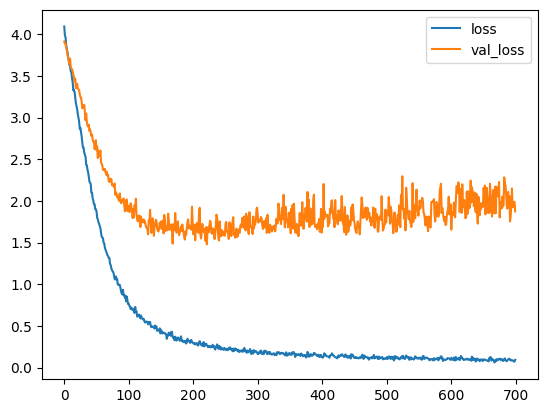

In [ ]:
resultant_df[["loss","val_loss"]].plot()

<Axes: >

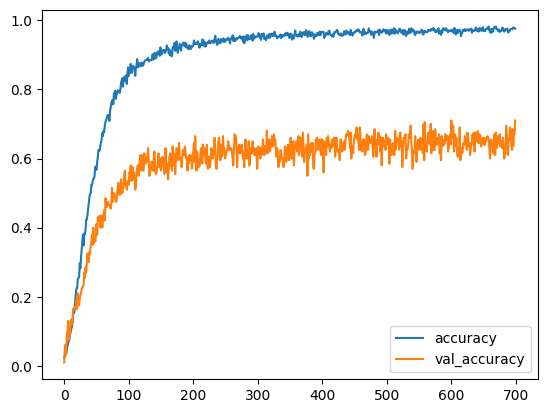

In [ ]:
resultant_df[["accuracy","val_accuracy"]].plot()

In [ ]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

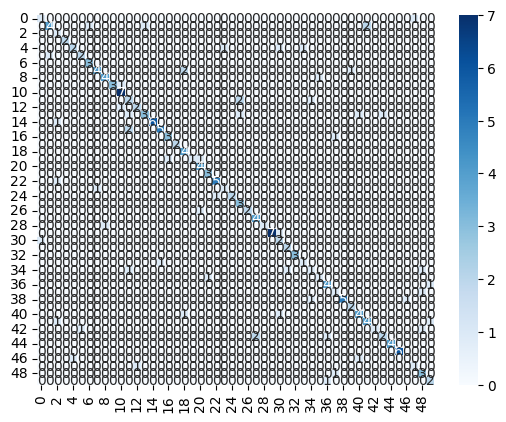

In [ ]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

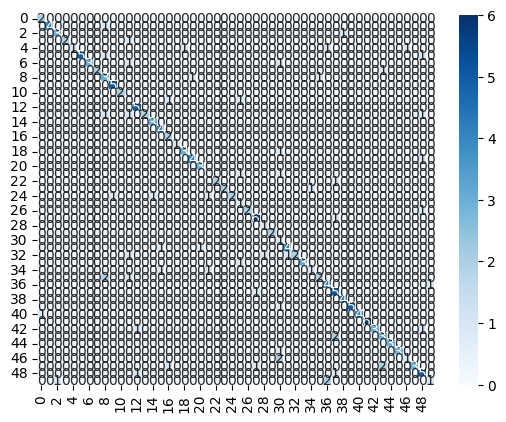

In [ ]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

#### Xception model

In [43]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.X_20C_1.keras")
model=load_model(folder_path)

In [44]:
# For validation set
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [45]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.9111111111111111
Test Accuracy: 0.7888888888888889
Validation Precision: 0.9306613756613755
Test Precision: 0.855952380952381
Validation Recall: 0.9111111111111111
Test Recall: 0.7888888888888889
Validation F1-score: 0.9124314574314576
Test F1-score: 0.7880992464325797


In [ ]:
metrics_df = pd.DataFrame(history.history)

<Axes: >

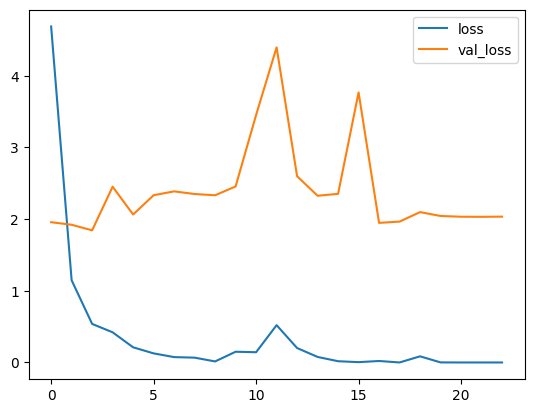

In [ ]:
metrics_df[["loss","val_loss"]].plot()

<Axes: >

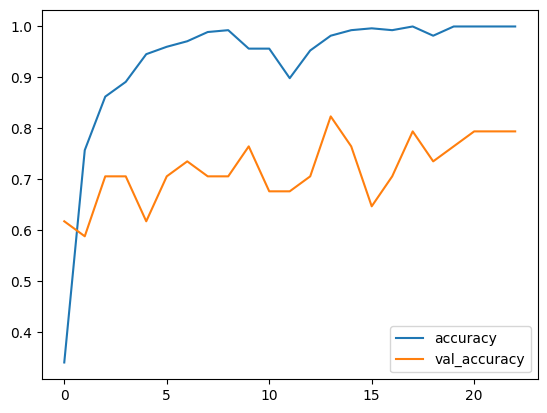

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot()

In [ ]:
conf_matrix_val = confusion_matrix(y_val_t, y_pred_val)
conf_matrix_test = confusion_matrix(y_test_t, y_pred_test)

<Axes: >

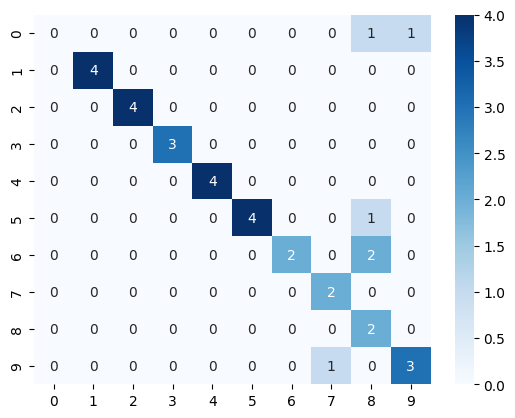

In [ ]:
sns.heatmap(conf_matrix_val, annot=True, cmap='Blues')

<Axes: >

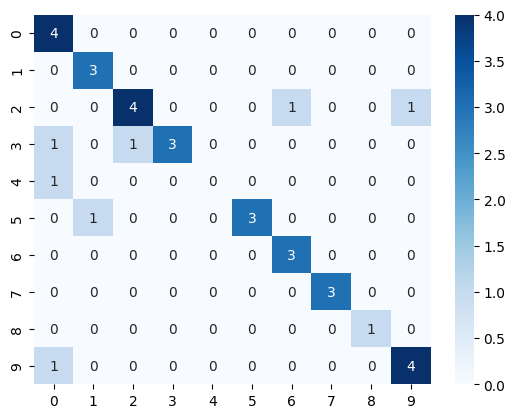

In [ ]:
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues')

#### ResNet + BiLSTM

In [ ]:
metrics_df = pd.DataFrame(history.history)
# metrics_df.to_csv(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\R50_Bi_df_pt1.csv')

In [ ]:
metrics_df1 = pd.DataFrame(history.history)

In [ ]:
from tensorflow.keras.models import load_model
log_dir = r'C:\Users\revan\Documents\FYP_HWU\Logs_50'
folder_path = os.path.join(log_dir,"ckpt.Res_Bi_50C_2.keras")
model=load_model(folder_path)

In [ ]:
# For validation set
y_pred_val = np.argmax(model.predict(X_val, batch_size=2), axis=-1)
y_val_t = np.argmax(y_val, axis=-1)
# For test set
y_pred_test = np.argmax(model.predict(X_test, batch_size=2), axis=-1)
y_test_t = np.argmax(y_test, axis=-1)

In [ ]:
evaluation_metrix (y_val_t, y_pred_val, y_test_t, y_pred_test)

Validation Accuracy: 0.72
Test Accuracy: 0.805
Validation Precision: 0.7719940476190476
Test Precision: 0.8355416666666666
Validation Recall: 0.72
Test Recall: 0.805
Validation F1-score: 0.7200670718170719
Test F1-score: 0.799973803973804


c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\revan\anaconda3\envs\test_env_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
resultant_df = pd.concat([metrics_df, metrics_df1], axis=0, ignore_index=True)

<Axes: >

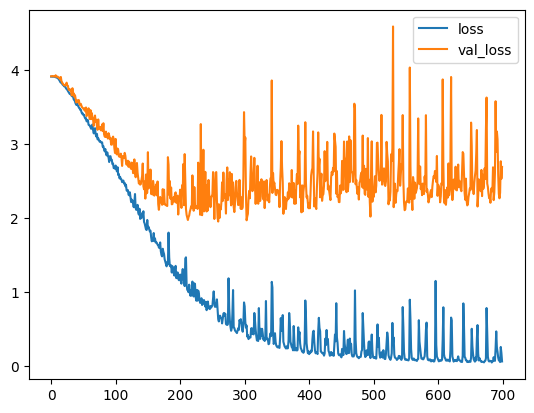

In [ ]:
resultant_df[["loss","val_loss"]].plot()

<Axes: >

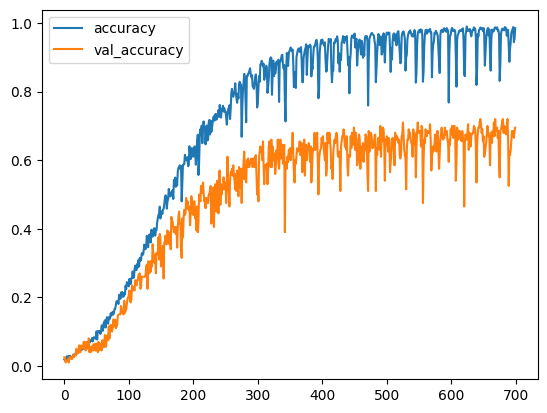

In [ ]:
resultant_df[["accuracy","val_accuracy"]].plot()

#### ResNet50

In [50]:
metrics_df = pd.DataFrame(history.history)

In [51]:
metrics_df.to_csv(r'C:\Users\revan\Documents\FYP_HWU\Logs_50\Extracted_features\R50_20C_df.csv', index=False)